In [1]:
import csv
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from mpl_toolkits import mplot3d
from numpy import set_printoptions
from numpy import absolute
from numpy import mean
from numpy import std

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from tensorflow import keras
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#from matplotlib import pyplot

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
    
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import get_test_data
import seaborn as sns
%matplotlib inline

In [2]:
prosody_data = pd.read_csv('prosodic_features_M.csv ')

In [3]:
prosody_data.head()

participant&question   duration    energy     power  min_pitch   max_pitch  \
0                 P1Q1  51.952125  0.015331  0.000295  75.232657  396.635613   
1                 P1Q2  38.677312  0.015185  0.000393  75.165527  397.613041   
2                 P1Q3  43.593896  0.014680  0.000337  71.034761  395.930688   
3                 P1Q4  23.435813  0.008920  0.000381  74.938673  248.733738   
4                 P1Q5  13.274833  0.003432  0.000259  93.949854  263.669188   

   mean_pitch   pitch_sd   pitch_abs  pitch_quant  ...  numRising  \
0  127.989222  27.821528  217.628692   119.690367  ...         91   
1  131.067490  26.452853  195.852246   124.820583  ...         71   
2  127.739086  26.006330  189.441736   120.457847  ...         79   
3  129.563914  19.334327  103.024640   124.473851  ...         36   
4  130.178482  26.595483  174.934601   120.272480  ...         19   

       numFall  RecommendHiring  Hired  Friendly  Friendly_c  \
0  4722.964842         5.106224      0  5.254784           1   
1  2928.482587         5.106224      0  5.254784           1   
2  3528.448990         5.106224      0  5.254784           1   
3  1924.546685         5.106224      0  5.254784           1   
4  1322.366516         5.106224      0  5.254784           1   

   StructuredAnswers  StructuredAnswers_c  NotStressed  NotStressed_c  
0            4.89158                    0      5.35076              0  
1            4.89158                    0      5.35076              0  
2            4.89158                    0      5.35076              0  
3            4.89158                    0      5.35076              0  
4            4.89158                    0      5.35076              0  

[5 rows x 67 columns]

In [4]:
prosody_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 67 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   participant&question  680 non-null    object 
 1   duration              680 non-null    float64
 2   energy                680 non-null    float64
 3   power                 680 non-null    float64
 4   min_pitch             680 non-null    float64
 5   max_pitch             680 non-null    float64
 6   mean_pitch            680 non-null    float64
 7   pitch_sd              680 non-null    float64
 8   pitch_abs             680 non-null    float64
 9   pitch_quant           680 non-null    float64
 10  pitchUvsVRatio        680 non-null    float64
 11  Time:8                680 non-null    float64
 12  iDifference           680 non-null    float64
 13  diffPitchMaxMin       680 non-null    float64
 14  diffPitchMaxMean      680 non-null    float64
 15  diffPitchMaxMode      6

In [5]:
prosody_data.describe()

duration      energy       power   min_pitch   max_pitch  mean_pitch  \
count  680.000000  680.000000  680.000000  680.000000  680.000000  680.000000   
mean    57.201539    0.010119    0.000159   74.356906  365.209221  169.242881   
std     36.117420    0.012226    0.000130    8.332808   41.614286   41.921335   
min     10.341458    0.000176    0.000013   56.049663  222.555742   92.979514   
25%     32.839339    0.002527    0.000065   71.320330  339.477409  124.543847   
50%     49.762437    0.005648    0.000119   73.929065  376.743832  180.010964   
75%     71.724484    0.013414    0.000221   75.644207  397.296921  203.342602   
max    376.992000    0.134692    0.000873  198.840510  424.360354  254.871233   

         pitch_sd   pitch_abs  pitch_quant  pitchUvsVRatio  ...   numRising  \
count  680.000000  680.000000   680.000000      680.000000  ...  680.000000   
mean    42.009550  246.886862   163.655634        1.193068  ...   88.869118   
std     13.154095   76.500370    46.615600        0.795525  ...   59.178885   
min     12.053274   76.004974    82.801688        0.301339  ...   11.000000   
25%     33.160269  196.724385   113.288462        0.736553  ...   47.750000   
50%     40.569432  247.524278   178.438806        1.035074  ...   76.000000   
75%     48.220307  293.743385   203.973193        1.350608  ...  112.250000   
max     97.363392  524.459680   247.959843        7.681538  ...  590.000000   

            numFall  RecommendHiring       Hired    Friendly  Friendly_c  \
count    680.000000       680.000000  680.000000  680.000000  680.000000   
mean    5564.506801         4.950746    0.073529    5.428758    0.470588   
std     4357.018782         0.721579    0.261196    0.761720    0.499502   
min       79.872717         3.189661    0.000000    3.367100    0.000000   
25%     2712.929560         4.529477    0.000000    4.988128    0.000000   
50%     4520.700221         4.967754    0.000000    5.454238    0.000000   
75%     7249.827921         5.448852    0.000000    6.042685    1.000000   
max    40513.328260         6.647218    1.000000    6.794652    1.000000   

       StructuredAnswers  StructuredAnswers_c  NotStressed  NotStressed_c  
count         680.000000           680.000000   680.000000     680.000000  
mean            4.740523             0.154412     5.420034       0.500000  
std             0.690786             0.361609     0.545949       0.500368  
min             2.808731             0.000000     3.861496       0.000000  
25%             4.306155             0.000000     5.067056       0.000000  
50%             4.808708             0.000000     5.498800       0.500000  
75%             5.210984             0.000000     5.769599       1.000000  
max             6.428013             1.000000     6.487857       1.000000  

[8 rows x 66 columns]

In [6]:
dA = pd.read_csv('prosodic_features_M1.csv ')
yRH = prosody_data['RecommendHiring']
yF = prosody_data['Friendly']
ySA = prosody_data['StructuredAnswers']
yNS = prosody_data['NotStressed']
cRH = prosody_data['Hired']
cF = prosody_data['Friendly_c']
cSA = prosody_data['StructuredAnswers_c']
cNS = prosody_data['NotStressed_c']


In [7]:
def drawHistogram(feature_name):
    sns.set_style('whitegrid')
    prosody_data[feature_name].hist(bins=30)
    plt.xlabel(feature_name)

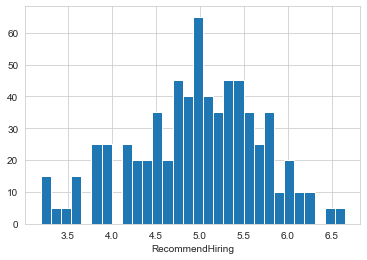

In [8]:
drawHistogram('RecommendHiring')

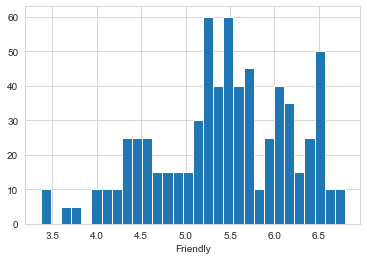

In [9]:
drawHistogram('Friendly')

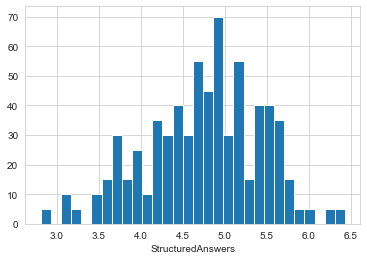

In [10]:
drawHistogram('StructuredAnswers')

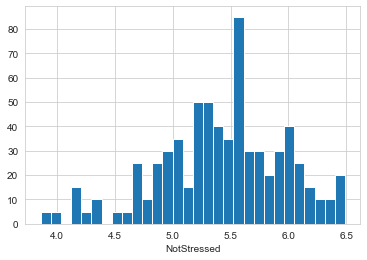

In [11]:
drawHistogram('NotStressed')

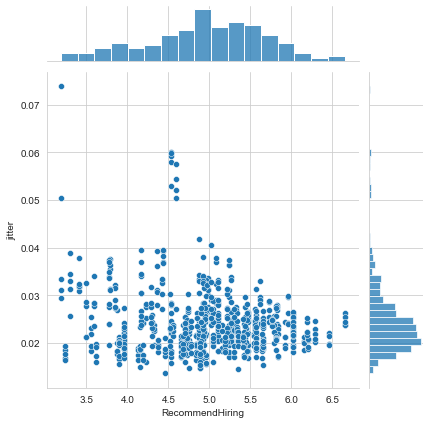

In [12]:
sns.jointplot(y='jitter', x='RecommendHiring', cmap= 'PiYG', data=prosody_data)

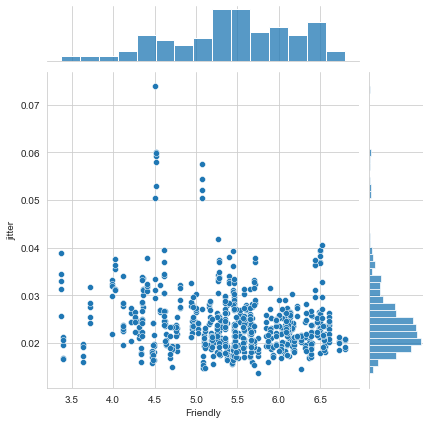

In [13]:
sns.jointplot(y='jitter', x='Friendly', cmap= 'PiYG', data=prosody_data)

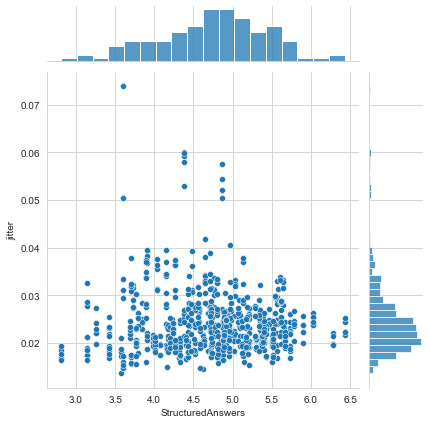

In [14]:
sns.jointplot(y='jitter', x='StructuredAnswers', cmap= 'PiYG', data=prosody_data)

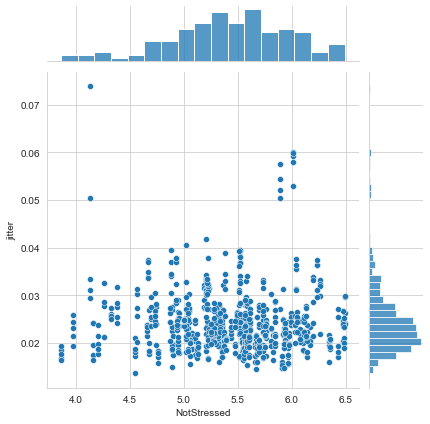

In [15]:
sns.jointplot(y='jitter', x='NotStressed', cmap= 'PiYG', data=prosody_data)

Text(0.5, 0, 'StructuredAnswers')

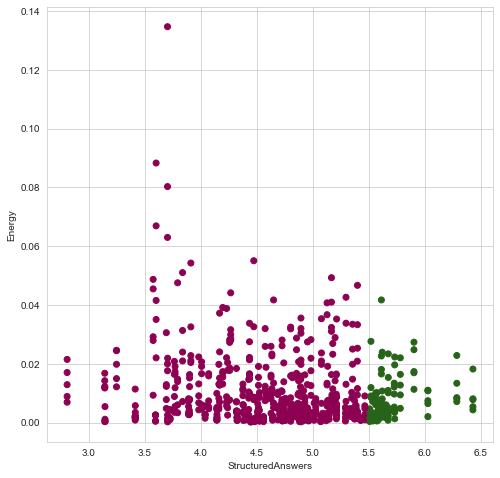

In [16]:

x1 = prosody_data['energy']
x2 = prosody_data['speakRate']
x3 = prosody_data['avgBand1']

# Creating plot
fig = plt.figure(figsize=(8,8))


ax = plt.axes()

#Creating color map plasma ocean RdPu  jet PiYG OrRd GnBu RdGy  RdBu BuGn BrBG viridis mako_r
plt.scatter(ySA,x1, c=cSA, cmap= 'PiYG')
plt.ylabel('Energy')
plt.xlabel('StructuredAnswers')


Text(0.5, 0, 'Friendly')

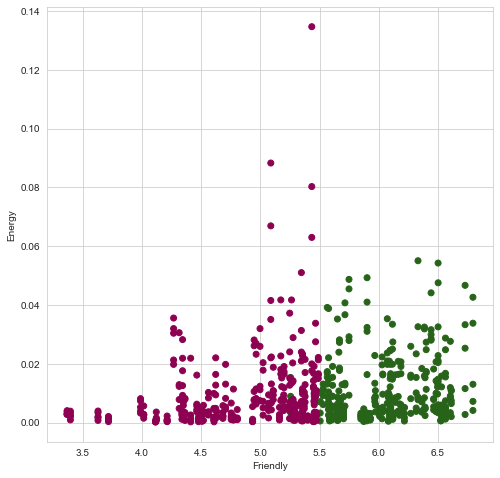

In [17]:
x1 = prosody_data['energy']
x2 = prosody_data['speakRate']
x3 = prosody_data['avgBand1']

# Creating plot
fig = plt.figure(figsize=(8,8))


ax = plt.axes()

#Creating color map plasma ocean RdPu  jet PiYG OrRd GnBu RdGy  RdBu BuGn BrBG viridis mako_r
plt.scatter(yF,x1, c=cF, cmap= 'PiYG')
plt.ylabel('Energy')
plt.xlabel('Friendly')


Text(0.5, 0, 'Not Stressed')

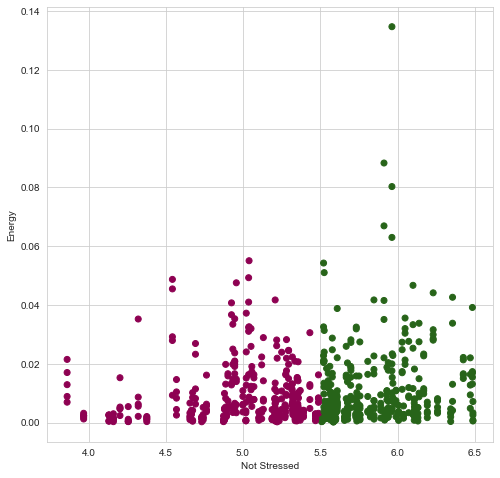

In [18]:
x1 = prosody_data['energy']
x2 = prosody_data['speakRate']
x3 = prosody_data['avgBand1']

# Creating plot
fig = plt.figure(figsize=(8,8))


ax = plt.axes()

#Creating color map plasma ocean RdPu  jet PiYG OrRd GnBu RdGy  RdBu BuGn BrBG viridis mako_r
plt.scatter(yNS,x1, c=cNS, cmap= 'PiYG')
plt.ylabel('Energy')
plt.xlabel('Not Stressed')


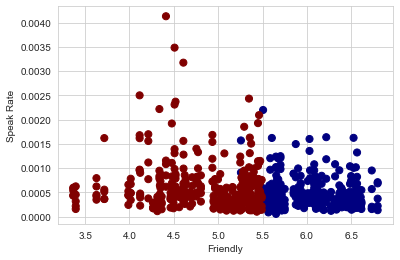

In [19]:
plt.scatter(yF,x2,c=cF, cmap= 'jet_r',s=50)
plt.ylabel('Speak Rate')
plt.xlabel('Friendly')
plt.show()

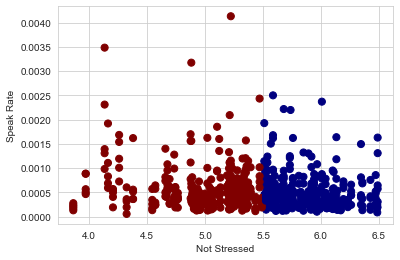

In [20]:
plt.scatter(yNS,x2,c=cNS, cmap= 'jet_r',s=50)
plt.ylabel('Speak Rate')
plt.xlabel('Not Stressed')
plt.show()

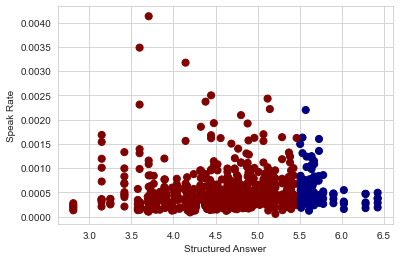

In [21]:
plt.scatter(ySA,x2,c=cSA, cmap= 'jet_r',s=50)
plt.ylabel('Speak Rate')
plt.xlabel('Structured Answer')
plt.show()

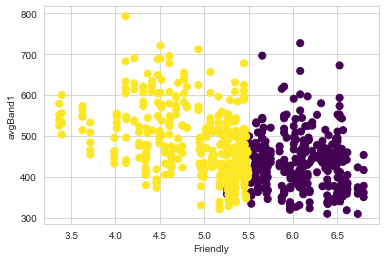

In [22]:
plt.scatter(yF,x3,c=cF, cmap= 'viridis_r',s=50)
plt.ylabel('avgBand1')
plt.xlabel('Friendly')
plt.show()

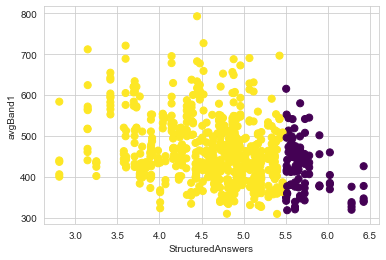

In [23]:
plt.scatter(ySA,x3,c=cSA, cmap= 'viridis_r',s=50)
plt.ylabel('avgBand1')
plt.xlabel('StructuredAnswers')
plt.show()

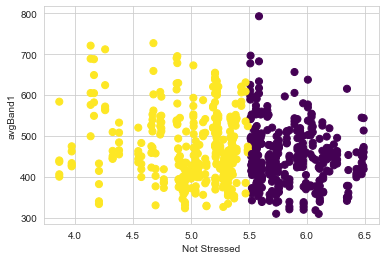

In [24]:
plt.scatter(yNS,x3,c=cNS, cmap= 'viridis_r',s=50)
plt.ylabel('avgBand1')
plt.xlabel('Not Stressed')
plt.show()

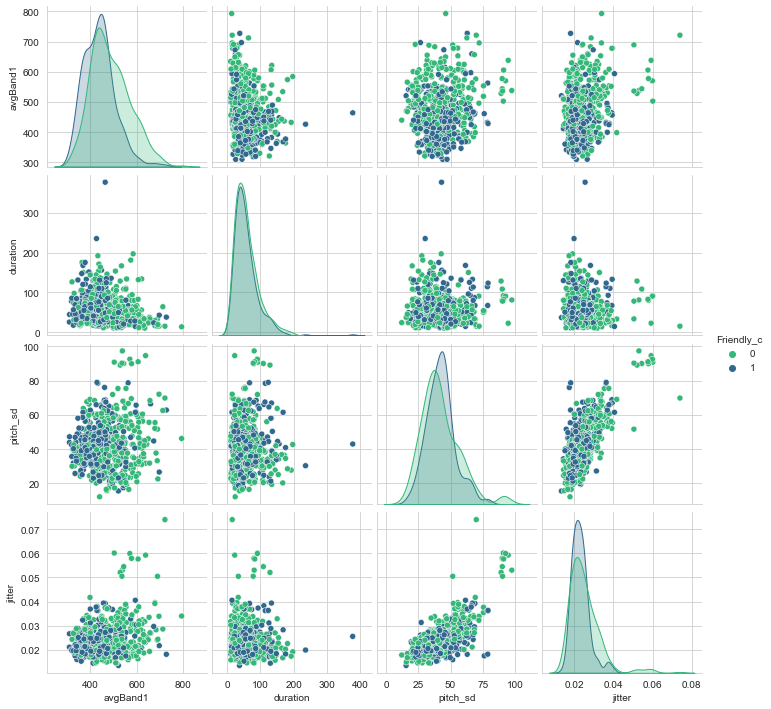

In [25]:
df1=prosody_data[['avgBand1', 'duration', 'pitch_sd', 'jitter','Friendly_c']]
sns.pairplot(df1,hue='Friendly_c',palette='viridis_r')

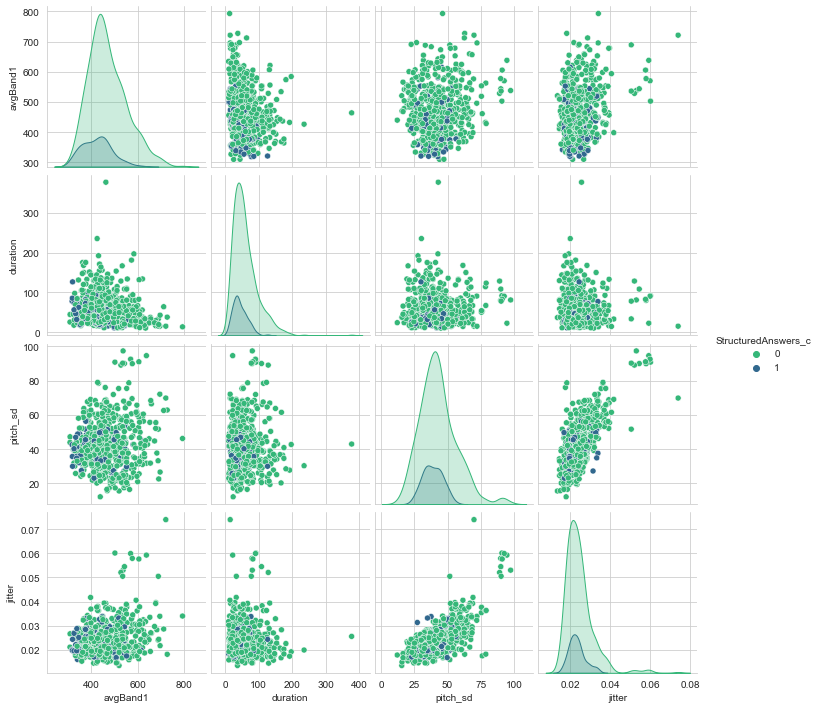

In [26]:
df1=prosody_data[['avgBand1', 'duration', 'pitch_sd', 'jitter','StructuredAnswers_c']]
sns.pairplot(df1,hue='StructuredAnswers_c',palette='viridis_r')

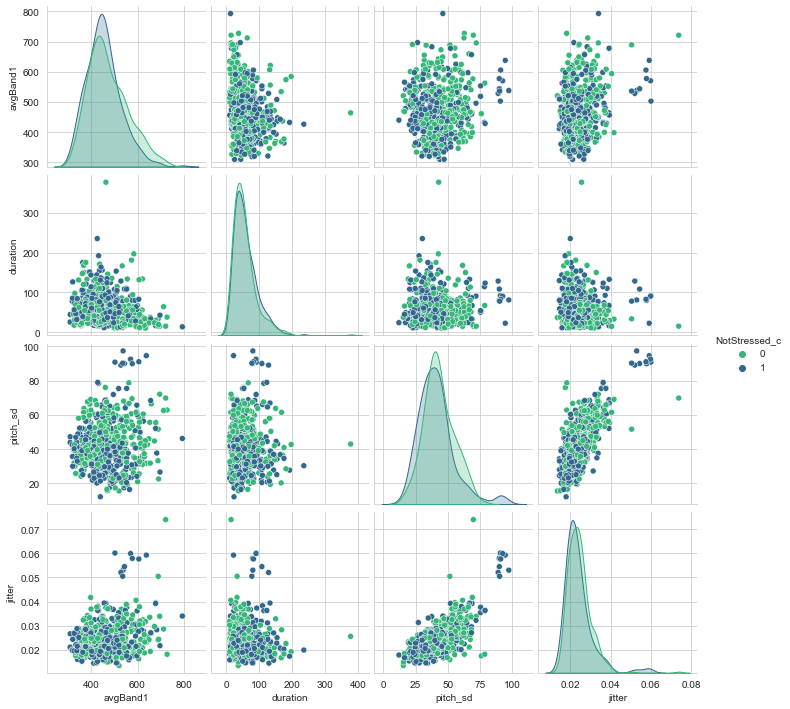

In [27]:
df1=prosody_data[['avgBand1', 'duration', 'pitch_sd', 'jitter','NotStressed_c']]
sns.pairplot(df1,hue='NotStressed_c',palette='viridis_r')

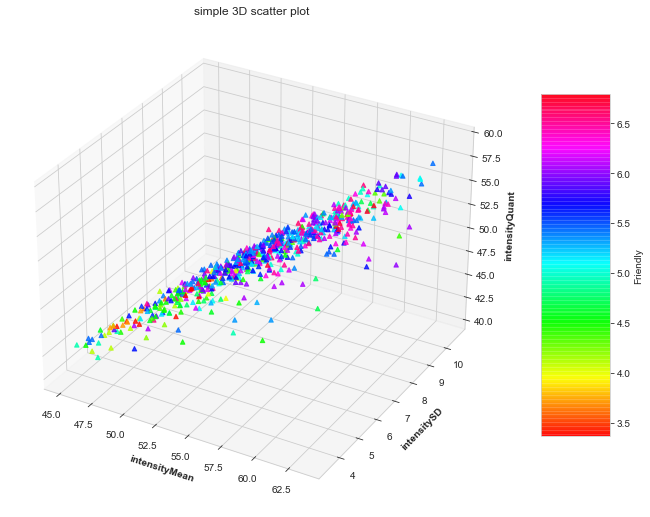

In [28]:
# Creating dataset
z = prosody_data['intensityQuant']
x = prosody_data['intensityMean']
y = prosody_data['intensitySD']
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map 
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = yF,
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('intensityMean', fontweight ='bold')
ax.set_ylabel('intensitySD', fontweight ='bold')
ax.set_zlabel('intensityQuant', fontweight ='bold')
fig.colorbar(sctt, shrink = 0.7,label = 'Friendly', aspect = 5)

# show plot


plt.show()



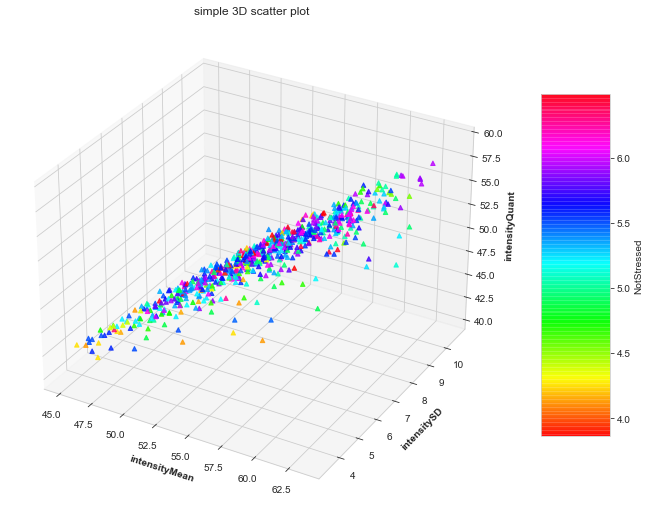

In [29]:
# Creating dataset
z = prosody_data['intensityQuant']
x = prosody_data['intensityMean']
y = prosody_data['intensitySD']
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map 
my_cmap = plt.get_cmap('hsv')

# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = yNS,
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('intensityMean', fontweight ='bold')
ax.set_ylabel('intensitySD', fontweight ='bold')
ax.set_zlabel('intensityQuant', fontweight ='bold')
fig.colorbar(sctt, shrink = 0.7,label = 'NotStressed', aspect = 5)

# show plot


plt.show()

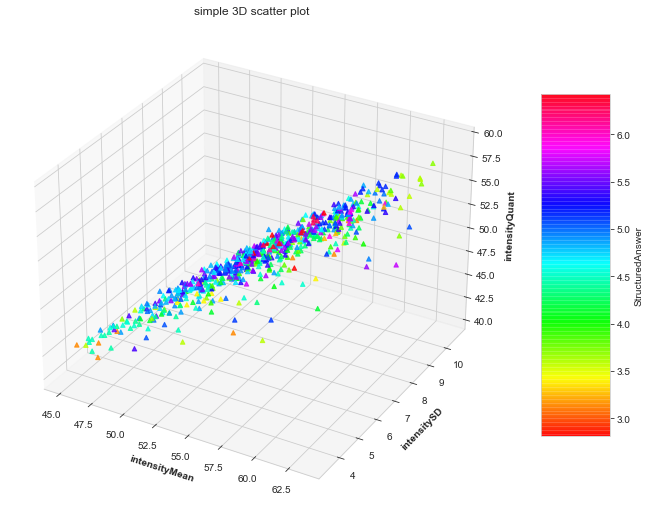

In [30]:
# Creating dataset
z = prosody_data['intensityQuant']
x = prosody_data['intensityMean']
y = prosody_data['intensitySD']
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map 
my_cmap = plt.get_cmap('hsv')

# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = ySA,
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('intensityMean', fontweight ='bold')
ax.set_ylabel('intensitySD', fontweight ='bold')
ax.set_zlabel('intensityQuant', fontweight ='bold')
fig.colorbar(sctt, shrink = 0.7,label = 'StructuredAnswer', aspect = 5)

# show plot


plt.show()

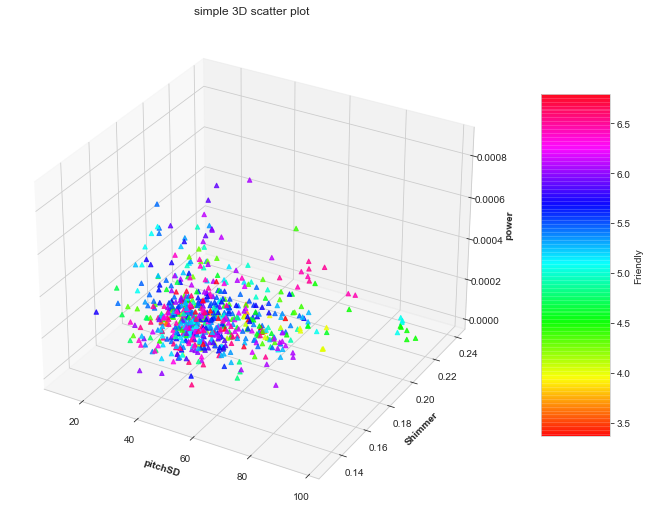

In [31]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset

x = prosody_data['pitch_sd']
y = prosody_data['shimmer']
z = prosody_data['power']

# Creating figure
fig = plt.figure(figsize = (16, 9))

ax = plt.axes(projection ="3d")

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map 
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = yF,
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('pitchSD', fontweight ='bold')
ax.set_ylabel('Shimmer', fontweight ='bold')
ax.set_zlabel('power', fontweight ='bold')
fig.colorbar(sctt, shrink = 0.7, label = 'Friendly',aspect = 5)

# show plot


plt.show()

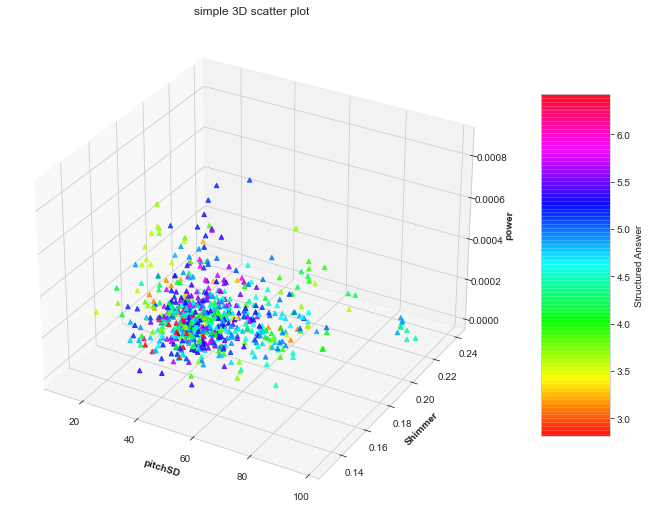

In [32]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset

x = prosody_data['pitch_sd']
y = prosody_data['shimmer']
z = prosody_data['power']

# Creating figure
fig = plt.figure(figsize = (16, 9))

ax = plt.axes(projection ="3d")

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map 
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = ySA,
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('pitchSD', fontweight ='bold')
ax.set_ylabel('Shimmer', fontweight ='bold')
ax.set_zlabel('power', fontweight ='bold')
fig.colorbar(sctt, shrink = 0.7, label = 'Structured Answer',aspect = 5)

# show plot


plt.show()

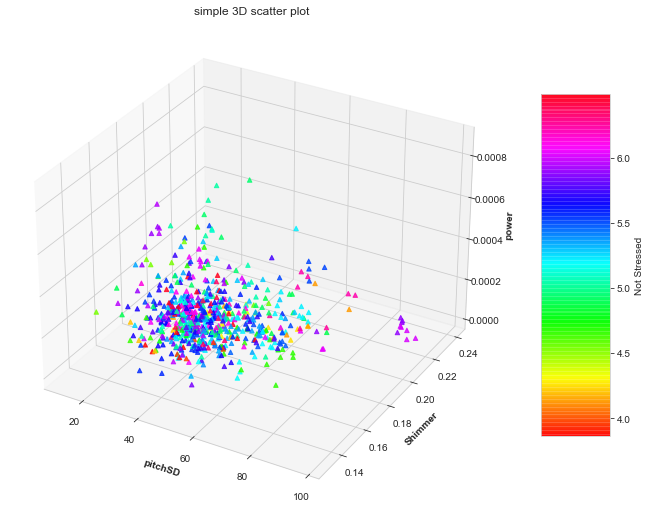

In [33]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset

x = prosody_data['pitch_sd']
y = prosody_data['shimmer']
z = prosody_data['power']

# Creating figure
fig = plt.figure(figsize = (16, 9))

ax = plt.axes(projection ="3d")

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map 
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = yNS,
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('pitchSD', fontweight ='bold')
ax.set_ylabel('Shimmer', fontweight ='bold')
ax.set_zlabel('power', fontweight ='bold')
fig.colorbar(sctt, shrink = 0.7, label = 'Not Stressed',aspect = 5)

# show plot


plt.show()

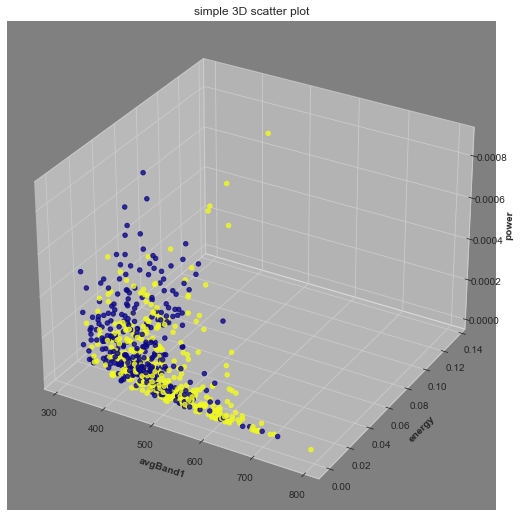

Text(0.5, 0, 'Energy')

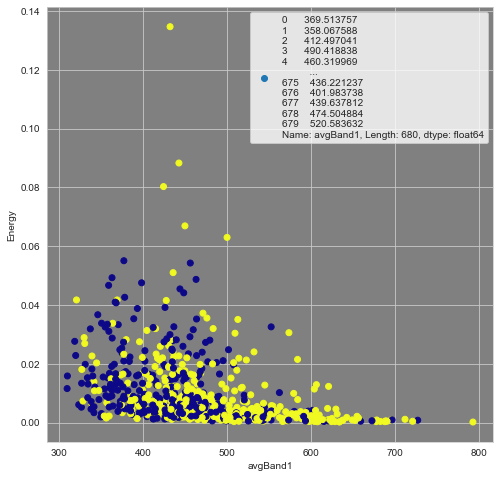

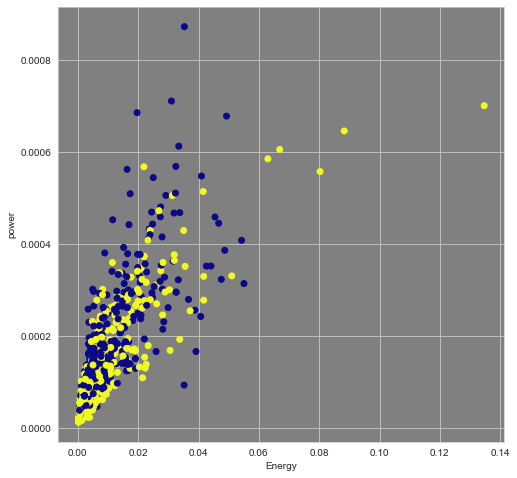

In [34]:
x = prosody_data['avgBand1']
y = prosody_data['energy']
z = prosody_data['power']

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
ax.set_facecolor("gray")  
# Add x, y gridlines
ax.grid(b = True, color ='black', 
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map plasma ocean RdPu  jet PiYG OrRd GnBu RdGy  RdBu BuGn BrBG viridis
my_cmap = plt.get_cmap('plasma_r') 
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = cF,
                    cmap = my_cmap,
                    marker ='o')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('avgBand1', fontweight ='bold')
ax.set_ylabel('energy', fontweight ='bold')
ax.set_zlabel('power', fontweight ='bold')
#fig.colorbar(sctt, shrink = 0.7, aspect = 5)

plt.show()

fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.set_facecolor("gray") 
plt.scatter(x, y, c=cF, cmap= 'plasma_r',label=x)
plt.ylabel('Energy')
plt.xlabel('avgBand1')
plt.legend()


fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.set_facecolor("gray")  
plt.scatter(y, z, c=cF, cmap= 'plasma_r')
plt.ylabel('power')
plt.xlabel('Energy')


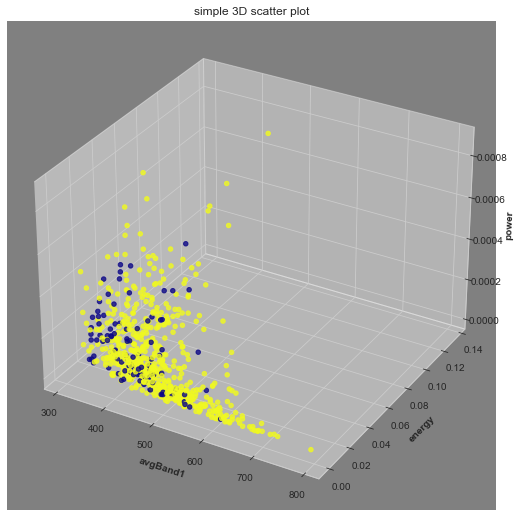

Text(0.5, 0, 'Energy')

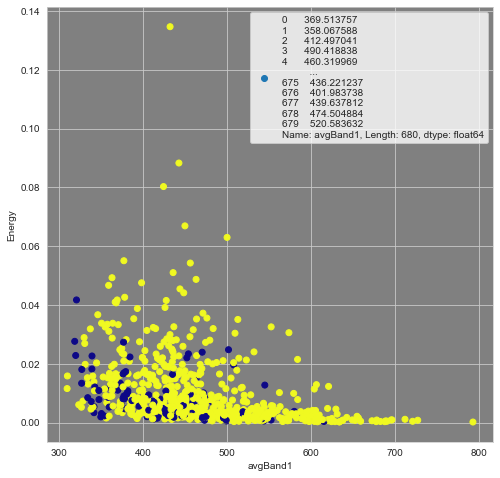

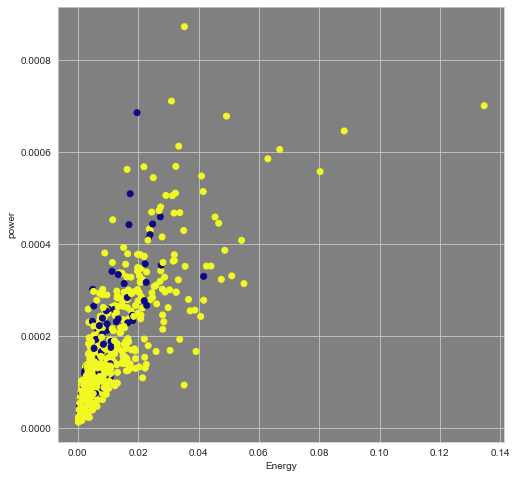

In [35]:
x = prosody_data['avgBand1']
y = prosody_data['energy']
z = prosody_data['power']

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
ax.set_facecolor("gray")  
# Add x, y gridlines
ax.grid(b = True, color ='black', 
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map plasma ocean RdPu  jet PiYG OrRd GnBu RdGy  RdBu BuGn BrBG viridis
my_cmap = plt.get_cmap('plasma_r') 
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = cSA,
                    cmap = my_cmap,
                    marker ='o')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('avgBand1', fontweight ='bold')
ax.set_ylabel('energy', fontweight ='bold')
ax.set_zlabel('power', fontweight ='bold')
#fig.colorbar(sctt, shrink = 0.7, aspect = 5)

plt.show()

fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.set_facecolor("gray") 
plt.scatter(x, y, c=cSA, cmap= 'plasma_r',label=x)
plt.ylabel('Energy')
plt.xlabel('avgBand1')
plt.legend()


fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.set_facecolor("gray")  
plt.scatter(y, z, c=cSA, cmap= 'plasma_r')
plt.ylabel('power')
plt.xlabel('Energy')


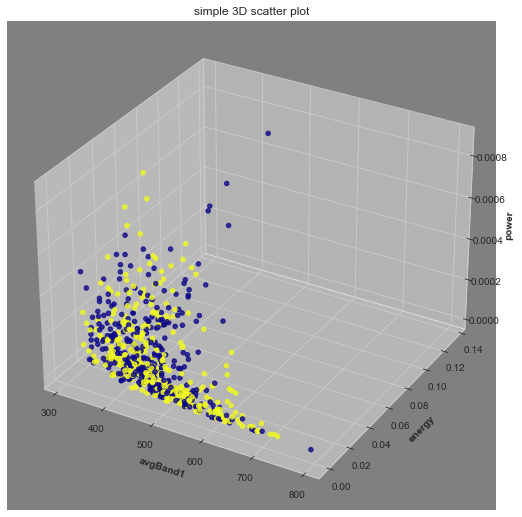

Text(0.5, 0, 'Energy')

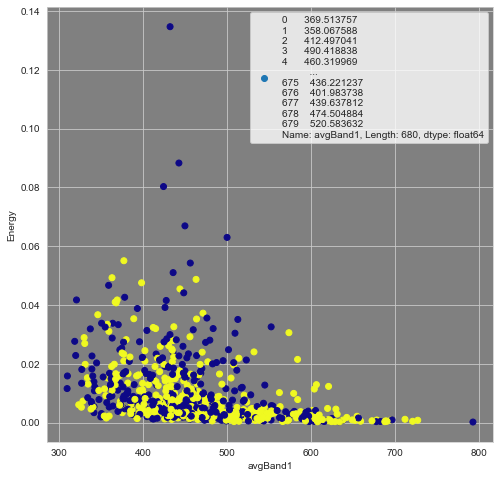

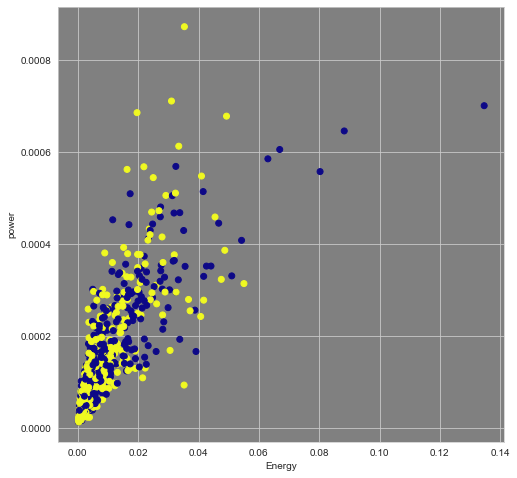

In [36]:
x = prosody_data['avgBand1']
y = prosody_data['energy']
z = prosody_data['power']

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
ax.set_facecolor("gray")  
# Add x, y gridlines
ax.grid(b = True, color ='black', 
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map plasma ocean RdPu  jet PiYG OrRd GnBu RdGy  RdBu BuGn BrBG viridis
my_cmap = plt.get_cmap('plasma_r') 
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = cNS,
                    cmap = my_cmap,
                    marker ='o')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('avgBand1', fontweight ='bold')
ax.set_ylabel('energy', fontweight ='bold')
ax.set_zlabel('power', fontweight ='bold')
#fig.colorbar(sctt, shrink = 0.7, aspect = 5)

plt.show()

fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.set_facecolor("gray") 
plt.scatter(x, y, c=cNS, cmap= 'plasma_r',label=x)
plt.ylabel('Energy')
plt.xlabel('avgBand1')
plt.legend()


fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.set_facecolor("gray")  
plt.scatter(y, z, c=cNS, cmap= 'plasma_r')
plt.ylabel('power')
plt.xlabel('Energy')


In [37]:
cor = dA.corr()
cor.style.background_gradient(cmap="coolwarm").set_precision(2)

<AxesSubplot:xlabel='Friendly_c', ylabel='meanPeriod'>

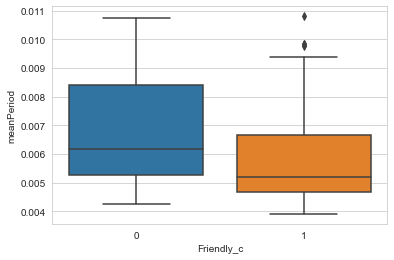

In [38]:
sns.boxplot(x=cF, y='meanPeriod',data= prosody_data)

<AxesSubplot:xlabel='StructuredAnswers_c', ylabel='f2STDf1'>

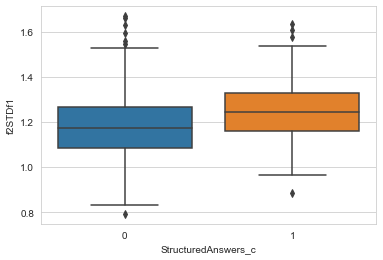

In [39]:
sns.boxplot(x=cSA, y='f2STDf1',data= prosody_data)

<AxesSubplot:xlabel='NotStressed_c', ylabel='power'>

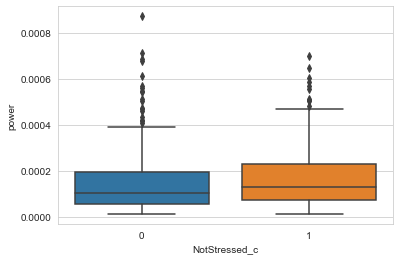

In [40]:
sns.boxplot(x=cNS, y='power',data= prosody_data)

<AxesSubplot:xlabel='Friendly_c', ylabel='avgBand1'>

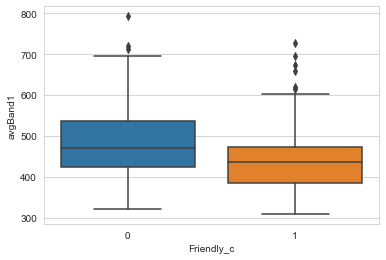

In [41]:
sns.boxplot(x=cF, y='avgBand1',data= prosody_data)

<AxesSubplot:xlabel='NotStressed_c', ylabel='avgBand1'>

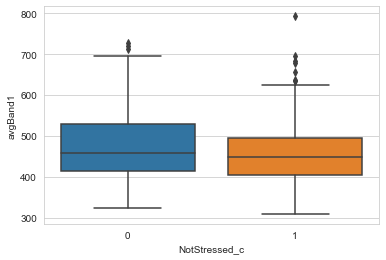

In [42]:
sns.boxplot(x=cNS, y='avgBand1',data= prosody_data)

<AxesSubplot:xlabel='StructuredAnswers_c', ylabel='avgBand1'>

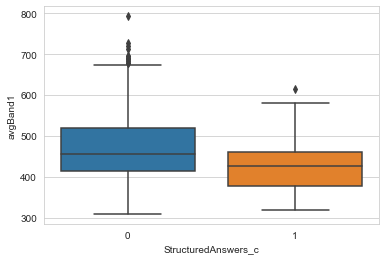

In [43]:
sns.boxplot(x=cSA, y='avgBand1',data= prosody_data)

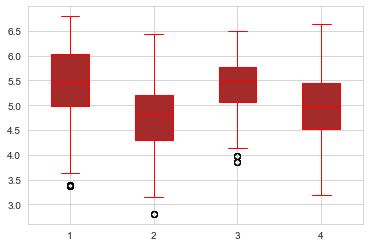

In [44]:
import matplotlib.pyplot as plt

def box_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
fig, ax = plt.subplots()
box_plot([yF,ySA,yNS,yRH], 'red', 'brown')
#ax.set(y='avgBand1')
plt.show()

box_plot([yF,ySA,yNS,yRH], 'blue', 'cyan')
ax.set_ylim(prosody_data['meanPeriod'])

plt.show()

Text(0.5, 1.0, 'Percentage %')

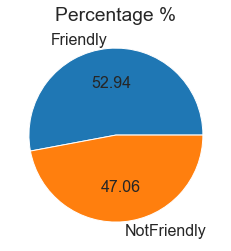

In [45]:
Hr = np.array(cF.value_counts())
arr = cF
arrLB = []
for i in arr:
    if(i==0):
        arrLB.append('Friendly')
    else:
        arrLB.append('NotFriendly')
x=np.array(arrLB)
lb = (np.unique(x))
plt.rcParams.update({'font.size':16})#figure.figsize':[10,10],
plt.pie(Hr,labels = lb, autopct = '%0.2f')
plt.title("Percentage %")

Text(0.5, 1.0, 'Percentage %')

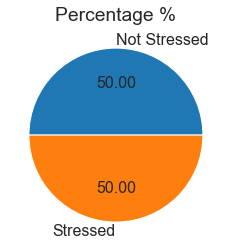

In [46]:
Hr = np.array(cNS.value_counts())
arr = cNS
arrLB = []
for i in arr:
    if(i==0):
        arrLB.append('Not Stressed')
    else:
        arrLB.append('Stressed')
x=np.array(arrLB)
lb = (np.unique(x))
plt.rcParams.update({'font.size':16})#figure.figsize':[12,12],
plt.pie(Hr,labels = lb, autopct = '%0.2f')
plt.title("Percentage %")

Text(0.5, 1.0, 'Percentage %')

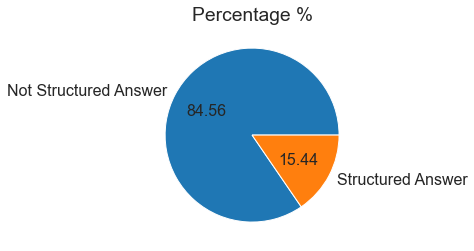

In [47]:
Hr = np.array(cSA.value_counts())
arr = cSA
arrLB = []
for i in arr:
    if(i==0):
        arrLB.append('Structured Answer')
    else:
        arrLB.append('Not Structured Answer')
x=np.array(arrLB)
lb = (np.unique(x))
plt.rcParams.update({'font.size':16})#figure.figsize':[10,10],
plt.pie(Hr,labels = lb, autopct = '%0.2f')
plt.title("Percentage %")

In [48]:
ranks = {}
from sklearn.preprocessing import MinMaxScaler
 
def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    #ranks = map(lambda x: round(x, 5), ranks)
    return dict(zip(names, ranks ))

# Feature Selection Using Kbest

In [49]:

def select_feature_kbest(prosody_data_y):
    array =  prosody_data.values

    X = prosody_data_X
    y = prosody_data_y
    # feature extraction
    kbest_test = SelectKBest(score_func=f_classif, k=4)
    fit = kbest_test.fit(X, y)
    # summarize scores
    set_printoptions(precision=3)
    #print(fit.scores_)
    features = fit.transform(X)
    # summarize selected features
    #print(features[0:5,:])

    ranks["kbest"] = rank_to_dict(np.abs(fit.scores_), prosody_data_X)
    rankDict = {}
    rankDict = ranks["kbest"]
    return rankDict


# Feature Selection Using Ridge Regression

In [50]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
# load the dataset
def select_feature_ridge(prosody_data_y):
    array = prosody_data.values
    X=prosody_data_X
    y=prosody_data_y
    # define model
    ridge_model = Ridge(alpha=1.0)
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(ridge_model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    scores = absolute(scores)
    print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))
    print(scores)
    
    ranks["ridge"] = rank_to_dict(np.abs(scores), prosody_data_X)
    rankDict = {}
    rankDict = ranks["ridge"]
    return rankDict

# Feature Selection Using Lasso

In [51]:
from sklearn.linear_model import Lasso 

def select_feature_lasso(prosody_data_y):
    array =  prosody_data.values

    X = prosody_data_X
    y = prosody_data_y
    
    lasso = Lasso(alpha=.5)
    lasso.fit(X, y)

    cross_val_score(lasso, prosody_data_X , prosody_data_y,cv=3)

    ranks["Lasso"] = rank_to_dict(np.abs(lasso.coef_), prosody_data_X)
    rankDict = {}
    rankDict = ranks['Lasso']
    return rankDict

# Feature Selection Using LDA

In [52]:
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define dataset
def select_feature_LDA(prosody_data_y):
    X= prosody_data_X
    y= prosody_data_y
    # define model
    model = LinearDiscriminantAnalysis(solver='lsqr')
    # define model evaluation method
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define grid
    grid = dict()
    grid['shrinkage'] = arange(0, 1, 0.01)
    # define search
    search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
    # perform the search
    results = search.fit(X, y)
    # summarize
    print('Mean Accuracy: %.3f' % results.best_score_)
    print('Config: %s' % results.best_params_)

# Making arrays of Top 10 20 30 Features

In [53]:
def select_features(rankDict):
    selectedFeatures = []

    selectedFeatures = dict(sorted(rankDict.items(), key=lambda item: item[1],reverse=True))


    selectedFeatures_10 = []
    i=0
    for key in selectedFeatures.keys():
        if(i<10):
            selectedFeatures_10.append(key)
            i+=1

    selectedFeatures_20 = []
    i=0
    for key in selectedFeatures.keys():
        if(i<20):
            selectedFeatures_20.append(key)
            i+=1

    selectedFeatures_30 = []
    i=0
    for key in selectedFeatures.keys():
        if(i<30):
            selectedFeatures_30.append(key)
            i+=1
    return selectedFeatures_10,selectedFeatures_20,selectedFeatures_30


In [54]:
prosody_data_X = prosody_data.drop(['participant&question','Hired','RecommendHiring','Friendly','Friendly_c','StructuredAnswers','StructuredAnswers_c','NotStressed','NotStressed_c'],axis=1)

# Feature selection for RecommendHirig using KBest

In [55]:
#feature ranks for RecommendHiring
prosody_data_y = yRH
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)
selectedFeatures_RecommendHiring_Kbest=select_feature_kbest(yRH)
print("\nScores of Features for RecommendHiring")
selectedFeatures_RecommendHiring_Kbest


Scores of Features for RecommendHiring


{'duration': 0.021639330966149846,
 'energy': 0.04134538498387725,
 'power': 0.07773660845058039,
 'min_pitch': 0.009726004320205253,
 'max_pitch': 0.01897088013060464,
 'mean_pitch': 0.7990254283105979,
 'pitch_sd': 0.1509179731991408,
 'pitch_abs': 0.09459515265304856,
 'pitch_quant': 1.0000000000000002,
 'pitchUvsVRatio': 0.07339564115604419,
 'Time:8': 0.021639290243960323,
 'iDifference': 0.0011512734988992322,
 'diffPitchMaxMin': 0.019859086761528144,
 'diffPitchMaxMean': 0.05644312653676563,
 'diffPitchMaxMode': 0.06875769416074433,
 'intensityMin': 0.070053478329868,
 'intensityMax': 0.045101907349622945,
 'intensityMean': 0.13874527118743551,
 'intensitySD': 0.12735475920688644,
 'intensityQuant': 0.1259915385002846,
 'diffIntMaxMin': 0.043392305882511674,
 'diffIntMaxMean': 0.014950442298704675,
 'diffIntMaxMode': 0.016376947337397176,
 'avgVal1': 0.0653588164817065,
 'avgVal2': 0.10478081489025842,
 'avgVal3': 0.0,
 'avgBand1': 0.08553649296780874,
 'avgBand2': 0.14122625962

In [56]:
selectedFeatures_kbest_10_RecommendHiring,selectedFeatures_kbest_20_RecommendHiring,selectedFeatures_kbest_30_RecommendHiring= select_features(selectedFeatures_RecommendHiring_Kbest)

print("Top 10 Selected Features Using kbest for RecommendHiring:",selectedFeatures_kbest_10_RecommendHiring )

print("\n\n\nTop 20 Selected Features Using kbest for RecommendHiring:",selectedFeatures_kbest_20_RecommendHiring )

print("\n\n\nTop 30 Selected Features Using kbest for RecommendHiring:",selectedFeatures_kbest_30_RecommendHiring )

Top 10 Selected Features Using kbest for RecommendHiring: ['pitch_quant', 'meanPeriod', 'mean_pitch', 'fmean3', 'f3STD', 'f2STD', 'pitch_sd', 'shimmer', 'avgBand2', 'intensityMean']



Top 20 Selected Features Using kbest for RecommendHiring: ['pitch_quant', 'meanPeriod', 'mean_pitch', 'fmean3', 'f3STD', 'f2STD', 'pitch_sd', 'shimmer', 'avgBand2', 'intensityMean', 'jitter', 'intensitySD', 'intensityQuant', 'jitterRap', 'f1STD', 'avgVal2', 'fmean2', 'PercentBreaks', 'AvgTotFall:3', 'f2STDf1']



Top 30 Selected Features Using kbest for RecommendHiring: ['pitch_quant', 'meanPeriod', 'mean_pitch', 'fmean3', 'f3STD', 'f2STD', 'pitch_sd', 'shimmer', 'avgBand2', 'intensityMean', 'jitter', 'intensitySD', 'intensityQuant', 'jitterRap', 'f1STD', 'avgVal2', 'fmean2', 'PercentBreaks', 'AvgTotFall:3', 'f2STDf1', 'pitch_abs', 'f2STDf2', 'avgBand1', 'percentUnvoiced', 'AvgTotRis:3', 'power', 'pitchUvsVRatio', 'f3meanf1', 'intensityMin', 'diffPitchMaxMode']


# Feature selection for Friendly using KBest

In [57]:
#feature ranks for friendly
prosody_data_y = yF
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)
selectedFeatures_Friendly_Kbest=select_feature_kbest(yF)
print("\nScores of Features for Friendly")
selectedFeatures_Friendly_Kbest


Scores of Features for Friendly


{'duration': 0.021283634344039938,
 'energy': 0.04277261108063918,
 'power': 0.09024597450496029,
 'min_pitch': 0.009949350455250765,
 'max_pitch': 0.01807173478543294,
 'mean_pitch': 0.8104463790157489,
 'pitch_sd': 0.15460437518911654,
 'pitch_abs': 0.09560562921762276,
 'pitch_quant': 1.0,
 'pitchUvsVRatio': 0.07401583079781704,
 'Time:8': 0.021283582234297646,
 'iDifference': 0.0011919460355583143,
 'diffPitchMaxMin': 0.01901577547438009,
 'diffPitchMaxMean': 0.05431442770675403,
 'diffPitchMaxMode': 0.06615938178050315,
 'intensityMin': 0.08676152817950496,
 'intensityMax': 0.04642958881685452,
 'intensityMean': 0.1430756527026778,
 'intensitySD': 0.12593568401853214,
 'intensityQuant': 0.13504105933909932,
 'diffIntMaxMin': 0.0444526868836899,
 'diffIntMaxMean': 0.01524072790034728,
 'diffIntMaxMode': 0.016415377121386653,
 'avgVal1': 0.06569359852591906,
 'avgVal2': 0.10408399030099413,
 'avgVal3': 0.0,
 'avgBand1': 0.08556684669066744,
 'avgBand2': 0.14192367260040345,
 'avgBan

In [58]:
selectedFeatures_kbest_10_Friendly,selectedFeatures_kbest_20_Friendly,selectedFeatures_kbest_30_Friendly= select_features(selectedFeatures_Friendly_Kbest)

print("Top 10 Selected Features Using kbest for friendly:",selectedFeatures_kbest_10_Friendly )

print("\n\n\nTop 20 Selected Features Using kbest for friendly:",selectedFeatures_kbest_20_Friendly )

print("\n\n\nTop 30 Selected Features Using kbest for friendly:",selectedFeatures_kbest_30_Friendly )

Top 10 Selected Features Using kbest for friendly: ['pitch_quant', 'meanPeriod', 'mean_pitch', 'fmean3', 'f3STD', 'pitch_sd', 'f2STD', 'intensityMean', 'shimmer', 'avgBand2']



Top 20 Selected Features Using kbest for friendly: ['pitch_quant', 'meanPeriod', 'mean_pitch', 'fmean3', 'f3STD', 'pitch_sd', 'f2STD', 'intensityMean', 'shimmer', 'avgBand2', 'intensityQuant', 'jitter', 'intensitySD', 'jitterRap', 'f1STD', 'avgVal2', 'fmean2', 'AvgTotFall:3', 'PercentBreaks', 'pitch_abs']



Top 30 Selected Features Using kbest for friendly: ['pitch_quant', 'meanPeriod', 'mean_pitch', 'fmean3', 'f3STD', 'pitch_sd', 'f2STD', 'intensityMean', 'shimmer', 'avgBand2', 'intensityQuant', 'jitter', 'intensitySD', 'jitterRap', 'f1STD', 'avgVal2', 'fmean2', 'AvgTotFall:3', 'PercentBreaks', 'pitch_abs', 'f2STDf1', 'f2STDf2', 'power', 'intensityMin', 'avgBand1', 'percentUnvoiced', 'AvgTotRis:3', 'pitchUvsVRatio', 'f3meanf1', 'diffPitchMaxMode']



# Feature selection for Not Stressed using KBest

In [59]:
#feature ranks for Stressed
prosody_data_y = yNS
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)
selectedFeatures_NotStressed_Kbest=select_feature_kbest(yNS)
print("\nScores of Features for Not Stressed")
#selectedFeatures_NotStressed


Scores of Features for Not Stressed


In [60]:
selectedFeatures_kbest_10_NotStressed,selectedFeatures_kbest_20_NotStressed,selectedFeatures_kbest_30_NotStressed= select_features(selectedFeatures_NotStressed_Kbest)

print("Top 10 Selected Features Using kbest:",selectedFeatures_kbest_10_NotStressed )

print("\n\n\nTop 20 Selected Features Using kbest:",selectedFeatures_kbest_20_NotStressed )

print("\n\n\nTop 30 Selected Features Using kbest:",selectedFeatures_kbest_30_NotStressed )

Top 10 Selected Features Using kbest: ['pitch_quant', 'meanPeriod', 'mean_pitch', 'fmean3', 'f3STD', 'f2STD', 'pitch_sd', 'intensityMean', 'shimmer', 'avgBand2']



Top 20 Selected Features Using kbest: ['pitch_quant', 'meanPeriod', 'mean_pitch', 'fmean3', 'f3STD', 'f2STD', 'pitch_sd', 'intensityMean', 'shimmer', 'avgBand2', 'intensityQuant', 'jitter', 'intensitySD', 'jitterRap', 'f1STD', 'avgVal2', 'fmean2', 'PercentBreaks', 'AvgTotFall:3', 'f2STDf1']



Top 30 Selected Features Using kbest: ['pitch_quant', 'meanPeriod', 'mean_pitch', 'fmean3', 'f3STD', 'f2STD', 'pitch_sd', 'intensityMean', 'shimmer', 'avgBand2', 'intensityQuant', 'jitter', 'intensitySD', 'jitterRap', 'f1STD', 'avgVal2', 'fmean2', 'PercentBreaks', 'AvgTotFall:3', 'f2STDf1', 'pitch_abs', 'f2STDf2', 'power', 'avgBand1', 'intensityMin', 'percentUnvoiced', 'AvgTotRis:3', 'pitchUvsVRatio', 'f3meanf1', 'diffPitchMaxMode']


# Feature selection for Structured Answer using KBest

In [61]:
#feature ranks for Structured Answer
prosody_data_y = ySA
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)
selectedFeatures_StructuredAnswer_Kbest=select_feature_kbest(ySA)
print("\nScores of Features for Not Structured Answer")
#selectedFeatures_StructuredAnswer


Scores of Features for Not Structured Answer


In [62]:
selectedFeatures_kbest_10_StructuredAnswer,selectedFeatures_kbest_20_StructuredAnswer,selectedFeatures_kbest_30_StructuredAnswer= select_features(selectedFeatures_StructuredAnswer_Kbest)

print("Top 10 Selected Features Using kbest:",selectedFeatures_kbest_10_StructuredAnswer )

print("\n\n\nTop 20 Selected Features Using kbest:",selectedFeatures_kbest_20_StructuredAnswer )

print("\n\n\nTop 30 Selected Features Using kbest:",selectedFeatures_kbest_30_StructuredAnswer )

Top 10 Selected Features Using kbest: ['pitch_quant', 'meanPeriod', 'mean_pitch', 'fmean3', 'f3STD', 'f2STD', 'pitch_sd', 'intensityMean', 'shimmer', 'avgBand2']



Top 20 Selected Features Using kbest: ['pitch_quant', 'meanPeriod', 'mean_pitch', 'fmean3', 'f3STD', 'f2STD', 'pitch_sd', 'intensityMean', 'shimmer', 'avgBand2', 'intensityQuant', 'jitter', 'intensitySD', 'jitterRap', 'f1STD', 'avgVal2', 'fmean2', 'PercentBreaks', 'AvgTotFall:3', 'f2STDf1']



Top 30 Selected Features Using kbest: ['pitch_quant', 'meanPeriod', 'mean_pitch', 'fmean3', 'f3STD', 'f2STD', 'pitch_sd', 'intensityMean', 'shimmer', 'avgBand2', 'intensityQuant', 'jitter', 'intensitySD', 'jitterRap', 'f1STD', 'avgVal2', 'fmean2', 'PercentBreaks', 'AvgTotFall:3', 'f2STDf1', 'pitch_abs', 'f2STDf2', 'power', 'avgBand1', 'intensityMin', 'percentUnvoiced', 'AvgTotRis:3', 'pitchUvsVRatio', 'f3meanf1', 'diffPitchMaxMode']


# Feature selection for RecommendHiring using Ridge

In [63]:
#feature ranks for RecommendHiring ridge
prosody_data_y = yRH
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)
selectedFeatures_RecommendHiring_Ridge=select_feature_ridge(yRH)
print("\nScores of Features for RecommendHiring")
selectedFeatures_RecommendHiring_Ridge

Mean MAE: 0.474 (0.047)
[0.456 0.504 0.508 0.495 0.421 0.407 0.444 0.557 0.446 0.506 0.431 0.452
 0.45  0.451 0.605 0.507 0.451 0.462 0.515 0.409 0.538 0.411 0.445 0.484
 0.41  0.45  0.533 0.494 0.493 0.484]

Scores of Features for RecommendHiring


{'duration': 0.24656537557566205,
 'energy': 0.49143177166099106,
 'power': 0.5092668433275884,
 'min_pitch': 0.4446340618162794,
 'max_pitch': 0.07283262978414262,
 'mean_pitch': 0.0,
 'pitch_sd': 0.18705469883830173,
 'pitch_abs': 0.7606635868484348,
 'pitch_quant': 0.19857528550851677,
 'pitchUvsVRatio': 0.502633345914254,
 'Time:8': 0.12287790073133431,
 'iDifference': 0.22766762672443042,
 'diffPitchMaxMin': 0.2176383767460206,
 'diffPitchMaxMean': 0.22276818564593182,
 'diffPitchMaxMode': 1.0,
 'intensityMin': 0.5064350766484402,
 'intensityMax': 0.2234526895067228,
 'intensityMean': 0.28042095188691807,
 'intensitySD': 0.5488236506677953,
 'intensityQuant': 0.010280073324348216,
 'diffIntMaxMin': 0.6613021470715825,
 'diffIntMaxMean': 0.019848931921175428,
 'diffIntMaxMode': 0.19280412198582209,
 'avgVal1': 0.38765871068268076,
 'avgVal2': 0.016522897727037744,
 'avgVal3': 0.21730384639236533,
 'avgBand1': 0.6355057848934038,
 'avgBand2': 0.44231269442953325,
 'avgBand3': 0.4361

In [64]:
selectedFeatures_ridge_10_RecommendHiring,selectedFeatures_ridge_20_RecommendHiring,selectedFeatures_ridge_30_RecommendHiring= select_features(selectedFeatures_RecommendHiring_Ridge)

print("Top 10 Selected Features For RecommendHiring Using ridge :",selectedFeatures_ridge_10_RecommendHiring )

print("\n\n\nTop 20 Selected For RecommendHiring Features Using ridge:",selectedFeatures_ridge_20_RecommendHiring )

print("\n\n\nTop 30 Selected For RecommendHiring Features Using ridge:",selectedFeatures_ridge_30_RecommendHiring )

Top 10 Selected Features For RecommendHiring Using ridge : ['diffPitchMaxMode', 'pitch_abs', 'diffIntMaxMin', 'avgBand1', 'intensitySD', 'power', 'intensityMin', 'pitchUvsVRatio', 'energy', 'min_pitch']



Top 20 Selected For RecommendHiring Features Using ridge: ['diffPitchMaxMode', 'pitch_abs', 'diffIntMaxMin', 'avgBand1', 'intensitySD', 'power', 'intensityMin', 'pitchUvsVRatio', 'energy', 'min_pitch', 'avgBand2', 'avgBand3', 'fmean1', 'avgVal1', 'intensityMean', 'duration', 'iDifference', 'intensityMax', 'diffPitchMaxMean', 'diffPitchMaxMin']



Top 30 Selected For RecommendHiring Features Using ridge: ['diffPitchMaxMode', 'pitch_abs', 'diffIntMaxMin', 'avgBand1', 'intensitySD', 'power', 'intensityMin', 'pitchUvsVRatio', 'energy', 'min_pitch', 'avgBand2', 'avgBand3', 'fmean1', 'avgVal1', 'intensityMean', 'duration', 'iDifference', 'intensityMax', 'diffPitchMaxMean', 'diffPitchMaxMin', 'avgVal3', 'pitch_quant', 'diffIntMaxMode', 'pitch_sd', 'Time:8', 'max_pitch', 'diffIntMaxMean', 'a

# Feature selection for Friendly using Ridge

In [65]:
#feature ranks for friendly ridge
prosody_data_y = yF
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)
selectedFeatures_Friendly_Ridge=select_feature_ridge(yF)
print("\nScores of Features for Friendly")
selectedFeatures_Friendly_Ridge

Mean MAE: 0.473 (0.053)
[0.454 0.533 0.481 0.53  0.383 0.485 0.417 0.564 0.423 0.442 0.497 0.508
 0.418 0.432 0.471 0.432 0.473 0.507 0.474 0.501 0.553 0.465 0.45  0.607
 0.483 0.413 0.53  0.454 0.434 0.367]

Scores of Features for Friendly


{'duration': 0.3643924406561465,
 'energy': 0.6935659587908467,
 'power': 0.4751186950753219,
 'min_pitch': 0.6825855773075764,
 'max_pitch': 0.0704060083702398,
 'mean_pitch': 0.49340086145532114,
 'pitch_sd': 0.21149743782060115,
 'pitch_abs': 0.8232971452645605,
 'pitch_quant': 0.2361391521492764,
 'pitchUvsVRatio': 0.31379666358949376,
 'Time:8': 0.5419473720557217,
 'iDifference': 0.5903974307707758,
 'diffPitchMaxMin': 0.2151405490414653,
 'diffPitchMaxMean': 0.2716345427547173,
 'diffPitchMaxMode': 0.4346806122787983,
 'intensityMin': 0.274650466526273,
 'intensityMax': 0.4416019752733784,
 'intensityMean': 0.583917365564838,
 'intensitySD': 0.4492985310121773,
 'intensityQuant': 0.5620152450452034,
 'diffIntMaxMin': 0.7764243433016591,
 'diffIntMaxMean': 0.4121230860165881,
 'diffIntMaxMode': 0.34614027748131604,
 'avgVal1': 1.0,
 'avgVal2': 0.4868786122112092,
 'avgVal3': 0.19149673102778553,
 'avgBand1': 0.6793736480658845,
 'avgBand2': 0.36264139121338457,
 'avgBand3': 0.280

In [66]:
selectedFeatures_ridge_10_Friendly,selectedFeatures_ridge_20_Friendly,selectedFeatures_ridge_30_Friendly= select_features(selectedFeatures_Friendly_Ridge)

print("Top 10 Selected Features For Friendly Using ridge :",selectedFeatures_ridge_10_Friendly )

print("\n\n\nTop 20 Selected For Friendly Features Using ridge:",selectedFeatures_ridge_20_Friendly )

print("\n\n\nTop 30 Selected For Friendly Features Using ridge:",selectedFeatures_ridge_30_Friendly )

Top 10 Selected Features For Friendly Using ridge : ['avgVal1', 'pitch_abs', 'diffIntMaxMin', 'energy', 'min_pitch', 'avgBand1', 'iDifference', 'intensityMean', 'intensityQuant', 'Time:8']



Top 20 Selected For Friendly Features Using ridge: ['avgVal1', 'pitch_abs', 'diffIntMaxMin', 'energy', 'min_pitch', 'avgBand1', 'iDifference', 'intensityMean', 'intensityQuant', 'Time:8', 'mean_pitch', 'avgVal2', 'power', 'intensitySD', 'intensityMax', 'diffPitchMaxMode', 'diffIntMaxMean', 'duration', 'avgBand2', 'diffIntMaxMode']



Top 30 Selected For Friendly Features Using ridge: ['avgVal1', 'pitch_abs', 'diffIntMaxMin', 'energy', 'min_pitch', 'avgBand1', 'iDifference', 'intensityMean', 'intensityQuant', 'Time:8', 'mean_pitch', 'avgVal2', 'power', 'intensitySD', 'intensityMax', 'diffPitchMaxMode', 'diffIntMaxMean', 'duration', 'avgBand2', 'diffIntMaxMode', 'pitchUvsVRatio', 'avgBand3', 'intensityMin', 'diffPitchMaxMean', 'pitch_quant', 'diffPitchMaxMin', 'pitch_sd', 'avgVal3', 'max_pitch', 'fm

# Feature selection for Not Stressed using Ridge

In [67]:
#feature ranks for Not Stressed ridge
prosody_data_y = yNS
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)
selectedFeatures_NotStressed_Ridge=select_feature_ridge(yNS)
print("\nScores of Features for Not Stressed")
selectedFeatures_NotStressed_Ridge


Mean MAE: 0.412 (0.038)
[0.43  0.371 0.433 0.432 0.347 0.406 0.367 0.482 0.407 0.45  0.437 0.422
 0.388 0.361 0.392 0.422 0.39  0.425 0.436 0.437 0.503 0.37  0.369 0.41
 0.446 0.427 0.332 0.442 0.413 0.404]

Scores of Features for Not Stressed


{'duration': 0.5731169473298812,
 'energy': 0.22903321734324344,
 'power': 0.5881714508032643,
 'min_pitch': 0.5854766076631772,
 'max_pitch': 0.08908622524547538,
 'mean_pitch': 0.4314105933820189,
 'pitch_sd': 0.20807449369210373,
 'pitch_abs': 0.8756696492947784,
 'pitch_quant': 0.4406715258142626,
 'pitchUvsVRatio': 0.6913388870120085,
 'Time:8': 0.6133489495147424,
 'iDifference': 0.5290247223012423,
 'diffPitchMaxMin': 0.32750729208439844,
 'diffPitchMaxMean': 0.1713566441699046,
 'diffPitchMaxMode': 0.35242326578963,
 'intensityMin': 0.5283509601714524,
 'intensityMax': 0.3380248500584748,
 'intensityMean': 0.5426177090387816,
 'intensitySD': 0.607204852608991,
 'intensityQuant': 0.6130550285012293,
 'diffIntMaxMin': 0.9999999999999998,
 'diffIntMaxMean': 0.22414287837841607,
 'diffIntMaxMode': 0.2153859495208421,
 'avgVal1': 0.45534383718456106,
 'avgVal2': 0.6653385223277624,
 'avgVal3': 0.5564055700708248,
 'avgBand1': 0.0,
 'avgBand2': 0.6444913113793016,
 'avgBand3': 0.4733

In [68]:
selectedFeatures_ridge_10_NotStressed,selectedFeatures_ridge_20_NotStressed,selectedFeatures_ridge_30_NotStressed= select_features(selectedFeatures_NotStressed_Ridge)

print("Top 10 Selected Features Using ridge for Not Stressed:",selectedFeatures_ridge_10_NotStressed )

print("\n\n\nTop 20 Selected Features Using for Not Stressed:",selectedFeatures_ridge_20_NotStressed )

print("\n\n\nTop 30 Selected Features Using for Not Stressed:",selectedFeatures_ridge_30_NotStressed)

Top 10 Selected Features Using ridge for Not Stressed: ['diffIntMaxMin', 'pitch_abs', 'pitchUvsVRatio', 'avgVal2', 'avgBand2', 'Time:8', 'intensityQuant', 'intensitySD', 'power', 'min_pitch']



Top 20 Selected Features Using for Not Stressed: ['diffIntMaxMin', 'pitch_abs', 'pitchUvsVRatio', 'avgVal2', 'avgBand2', 'Time:8', 'intensityQuant', 'intensitySD', 'power', 'min_pitch', 'duration', 'avgVal3', 'intensityMean', 'iDifference', 'intensityMin', 'avgBand3', 'avgVal1', 'pitch_quant', 'mean_pitch', 'fmean1']



Top 30 Selected Features Using for Not Stressed: ['diffIntMaxMin', 'pitch_abs', 'pitchUvsVRatio', 'avgVal2', 'avgBand2', 'Time:8', 'intensityQuant', 'intensitySD', 'power', 'min_pitch', 'duration', 'avgVal3', 'intensityMean', 'iDifference', 'intensityMin', 'avgBand3', 'avgVal1', 'pitch_quant', 'mean_pitch', 'fmean1', 'diffPitchMaxMode', 'intensityMax', 'diffPitchMaxMin', 'energy', 'diffIntMaxMean', 'diffIntMaxMode', 'pitch_sd', 'diffPitchMaxMean', 'max_pitch', 'avgBand1']


# Feature Selection For Structured Answer using Ridge

In [69]:
#feature ranks for StructuredAnswer ridge
prosody_data_y = ySA
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)
selectedFeatures_StructuredAnswer_Ridge=select_feature_ridge(ySA)
print("\nScores of Features for Structured Answer")
selectedFeatures_StructuredAnswer_Ridge


Mean MAE: 0.477 (0.038)
[0.404 0.464 0.52  0.439 0.518 0.475 0.507 0.472 0.464 0.518 0.436 0.427
 0.474 0.501 0.533 0.482 0.477 0.493 0.491 0.443 0.494 0.446 0.505 0.413
 0.433 0.543 0.442 0.477 0.561 0.47 ]

Scores of Features for Structured Answer


{'duration': 0.0,
 'energy': 0.3849664180618224,
 'power': 0.7376175438389754,
 'min_pitch': 0.22041442239910136,
 'max_pitch': 0.7241972455786594,
 'mean_pitch': 0.45076542151775234,
 'pitch_sd': 0.6578961033143593,
 'pitch_abs': 0.43192889963635794,
 'pitch_quant': 0.38128744766774103,
 'pitchUvsVRatio': 0.7260129311586834,
 'Time:8': 0.2044982245000444,
 'iDifference': 0.14744560165293707,
 'diffPitchMaxMin': 0.4473863454416933,
 'diffPitchMaxMean': 0.6151112615402261,
 'diffPitchMaxMode': 0.8234705505099491,
 'intensityMin': 0.49890304626527326,
 'intensityMax': 0.4643990307380741,
 'intensityMean': 0.569601524843963,
 'intensitySD': 0.5509600334286784,
 'intensityQuant': 0.24903840320378956,
 'diffIntMaxMin': 0.5761531786013383,
 'diffIntMaxMean': 0.2671709613873494,
 'diffIntMaxMode': 0.6451818811136985,
 'avgVal1': 0.05934340623178169,
 'avgVal2': 0.1839393788742143,
 'avgVal3': 0.8834791903198309,
 'avgBand1': 0.24552169149362246,
 'avgBand2': 0.4623134838218128,
 'avgBand3': 1

# Feature selection for Structured Answer using Ridge

In [70]:
selectedFeatures_ridge_10_StructuredAnswer,selectedFeatures_ridge_20_StructuredAnswer,selectedFeatures_ridge_30_StructuredAnswer= select_features(selectedFeatures_StructuredAnswer_Ridge)

print("Top 10 Selected Features for Structured Answer Using ridge:",selectedFeatures_ridge_10_StructuredAnswer )

print("\n\n\nTop 20 Selected Features For Structured AnswerUsing ridge:",selectedFeatures_ridge_20_StructuredAnswer)

print("\n\n\nTop 30 Selected Features Using For Structured Answer ridge:",selectedFeatures_ridge_30_StructuredAnswer )

Top 10 Selected Features for Structured Answer Using ridge: ['avgBand3', 'avgVal3', 'diffPitchMaxMode', 'power', 'pitchUvsVRatio', 'max_pitch', 'pitch_sd', 'diffIntMaxMode', 'diffPitchMaxMean', 'diffIntMaxMin']



Top 20 Selected Features For Structured AnswerUsing ridge: ['avgBand3', 'avgVal3', 'diffPitchMaxMode', 'power', 'pitchUvsVRatio', 'max_pitch', 'pitch_sd', 'diffIntMaxMode', 'diffPitchMaxMean', 'diffIntMaxMin', 'intensityMean', 'intensitySD', 'intensityMin', 'intensityMax', 'avgBand2', 'mean_pitch', 'diffPitchMaxMin', 'pitch_abs', 'fmean1', 'energy']



Top 30 Selected Features Using For Structured Answer ridge: ['avgBand3', 'avgVal3', 'diffPitchMaxMode', 'power', 'pitchUvsVRatio', 'max_pitch', 'pitch_sd', 'diffIntMaxMode', 'diffPitchMaxMean', 'diffIntMaxMin', 'intensityMean', 'intensitySD', 'intensityMin', 'intensityMax', 'avgBand2', 'mean_pitch', 'diffPitchMaxMin', 'pitch_abs', 'fmean1', 'energy', 'pitch_quant', 'diffIntMaxMean', 'intensityQuant', 'avgBand1', 'min_pitch', 'T

# Feature selection for  RecommendHiring  using Lasso

In [71]:
#feature ranks for RecommendHiring using Lasso
prosody_data_y = yRH
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)
selectedFeatures_RecommendHiring_Lasso=select_feature_lasso(yRH)
print("\nScores of Features for RecommendHiring using Lasso")
selectedFeatures_RecommendHiring_Lasso


Scores of Features for RecommendHiring using Lasso


{'duration': 0.535460924797286,
 'energy': 0.0,
 'power': 0.0,
 'min_pitch': 0.0,
 'max_pitch': 0.0,
 'mean_pitch': 0.0,
 'pitch_sd': 0.987565807401495,
 'pitch_abs': 0.003007144479246105,
 'pitch_quant': 0.0,
 'pitchUvsVRatio': 0.0,
 'Time:8': 0.014438234622921592,
 'iDifference': 0.10480715247207019,
 'diffPitchMaxMin': 0.17391309911990793,
 'diffPitchMaxMean': 0.0,
 'diffPitchMaxMode': 0.0380615643097718,
 'intensityMin': 0.0,
 'intensityMax': 0.0,
 'intensityMean': 0.0,
 'intensitySD': 0.0,
 'intensityQuant': 0.0,
 'diffIntMaxMin': 0.0,
 'diffIntMaxMean': 0.0,
 'diffIntMaxMode': 0.0,
 'avgVal1': 0.0,
 'avgVal2': 0.0290270431968059,
 'avgVal3': 0.0010214446774961191,
 'avgBand1': 1.0,
 'avgBand2': 0.0,
 'avgBand3': 0.0,
 'fmean1': 0.0,
 'fmean2': 0.0001814854637147905,
 'fmean3': 0.34087412074195284,
 'f2meanf1': 0.0,
 'f3meanf1': 0.0,
 'f1STD': 0.0,
 'f2STD': 0.09417759379322473,
 'f3STD': 0.0,
 'f2STDf1': 0.0,
 'f2STDf2': 0.0,
 'jitter': 0.0,
 'shimmer': 0.0,
 'jitterRap': 0.0,
 '

In [72]:
selectedFeatures_lasso_10_RecommendHiring,selectedFeatures_lasso_20_RecommendHiring,selectedFeatures_lasso_30_RecommendHiring= select_features(selectedFeatures_RecommendHiring_Lasso)

print("Top 10 Selected Features for RecommendHiring Using Lasso:",selectedFeatures_lasso_10_RecommendHiring )

print("\n\n\nTop 20 Selected Features For RecommendHiring Using Lasso:",selectedFeatures_lasso_20_RecommendHiring)

print("\n\n\nTop 30 Selected Features Using For RecommendHiring Using Lasso:",selectedFeatures_lasso_30_RecommendHiring )

Top 10 Selected Features for RecommendHiring Using Lasso: ['avgBand1', 'pitch_sd', 'duration', 'fmean3', 'TotDurPause:3', 'MaxFalling:3', 'diffPitchMaxMin', 'iDifference', 'f2STD', 'iInterval']



Top 20 Selected Features For RecommendHiring Using Lasso: ['avgBand1', 'pitch_sd', 'duration', 'fmean3', 'TotDurPause:3', 'MaxFalling:3', 'diffPitchMaxMin', 'iDifference', 'f2STD', 'iInterval', 'diffPitchMaxMode', 'avgVal2', 'Time:8', 'numFall', 'pitch_abs', 'avgVal3', 'fmean2', 'energy', 'power', 'min_pitch']



Top 30 Selected Features Using For RecommendHiring Using Lasso: ['avgBand1', 'pitch_sd', 'duration', 'fmean3', 'TotDurPause:3', 'MaxFalling:3', 'diffPitchMaxMin', 'iDifference', 'f2STD', 'iInterval', 'diffPitchMaxMode', 'avgVal2', 'Time:8', 'numFall', 'pitch_abs', 'avgVal3', 'fmean2', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_quant', 'pitchUvsVRatio', 'diffPitchMaxMean', 'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant']


# Feature selection for friendly using Lasso

In [73]:
#feature ranks for friendly using Lasso
prosody_data_y = yF
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)
selectedFeatures_Friendly_Lasso=select_feature_lasso(yF)
print("\nScores of Features for Friendly using Lasso")
selectedFeatures_Friendly_Lasso


Scores of Features for Friendly using Lasso


{'duration': 0.0,
 'energy': 0.0,
 'power': 0.0,
 'min_pitch': 0.0,
 'max_pitch': 0.0,
 'mean_pitch': 1.0,
 'pitch_sd': 0.0,
 'pitch_abs': 0.018674844037481462,
 'pitch_quant': 0.0,
 'pitchUvsVRatio': 0.0,
 'Time:8': 0.0,
 'iDifference': 0.004150398376088212,
 'diffPitchMaxMin': 0.1459976113337212,
 'diffPitchMaxMean': 0.0,
 'diffPitchMaxMode': 0.06612907706805303,
 'intensityMin': 0.0,
 'intensityMax': 0.27795411851569174,
 'intensityMean': 0.0,
 'intensitySD': 0.0,
 'intensityQuant': 0.0,
 'diffIntMaxMin': 0.5145412974107927,
 'diffIntMaxMean': 0.0,
 'diffIntMaxMode': 0.0,
 'avgVal1': 0.0,
 'avgVal2': 0.0,
 'avgVal3': 0.00849862378330651,
 'avgBand1': 0.5229512545802276,
 'avgBand2': 0.0,
 'avgBand3': 0.045545928137832245,
 'fmean1': 0.0,
 'fmean2': 0.0,
 'fmean3': 0.2386642717143209,
 'f2meanf1': 0.0,
 'f3meanf1': 0.0,
 'f1STD': 0.11969190559696806,
 'f2STD': 0.2288299899503694,
 'f3STD': 0.32358327854409413,
 'f2STDf1': 0.0,
 'f2STDf2': 0.0,
 'jitter': 0.0,
 'shimmer': 0.0,
 'jitte

In [74]:
selectedFeatures_lasso_10_Friendly,selectedFeatures_lasso_20_Friendly,selectedFeatures_lasso_30_Friendly= select_features(selectedFeatures_Friendly_Lasso)

print("Top 10 Selected Features for Friendly Using Lasso:",selectedFeatures_lasso_10_Friendly )

print("\n\n\nTop 20 Selected Features For Friendly Using Lasso:",selectedFeatures_lasso_20_Friendly)

print("\n\n\nTop 30 Selected Features Using For Friendly Using Lasso:",selectedFeatures_lasso_30_Friendly )

Top 10 Selected Features for Friendly Using Lasso: ['mean_pitch', 'avgBand1', 'diffIntMaxMin', 'numVoiceBreaks', 'f3STD', 'intensityMax', 'fmean3', 'f2STD', 'diffPitchMaxMin', 'f1STD']



Top 20 Selected Features For Friendly Using Lasso: ['mean_pitch', 'avgBand1', 'diffIntMaxMin', 'numVoiceBreaks', 'f3STD', 'intensityMax', 'fmean3', 'f2STD', 'diffPitchMaxMin', 'f1STD', 'MaxFalling:3', 'MaxRising:3', 'diffPitchMaxMode', 'avgBand3', 'pitch_abs', 'avgVal3', 'numFall', 'iDifference', 'duration', 'energy']



Top 30 Selected Features Using For Friendly Using Lasso: ['mean_pitch', 'avgBand1', 'diffIntMaxMin', 'numVoiceBreaks', 'f3STD', 'intensityMax', 'fmean3', 'f2STD', 'diffPitchMaxMin', 'f1STD', 'MaxFalling:3', 'MaxRising:3', 'diffPitchMaxMode', 'avgBand3', 'pitch_abs', 'avgVal3', 'numFall', 'iDifference', 'duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'pitch_sd', 'pitch_quant', 'pitchUvsVRatio', 'Time:8', 'diffPitchMaxMean', 'intensityMin', 'intensityMean']


In [75]:
#feature ranks for Not Stressed using Lasso
prosody_data_y = yNS
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)
selectedFeatures_NotStressed_Lasso=select_feature_lasso(yNS)
print("\nScores of Features for Not Stressed using Lasso")
selectedFeatures_NotStressed_Lasso


Scores of Features for Not Stressed using Lasso


{'duration': 0.0,
 'energy': 0.0,
 'power': 0.0,
 'min_pitch': 0.0,
 'max_pitch': 0.0,
 'mean_pitch': 0.0,
 'pitch_sd': 0.0,
 'pitch_abs': 0.1512193958452391,
 'pitch_quant': 0.8441037803855456,
 'pitchUvsVRatio': 0.0,
 'Time:8': 0.0,
 'iDifference': 0.27919748294615493,
 'diffPitchMaxMin': 0.0,
 'diffPitchMaxMean': 0.0,
 'diffPitchMaxMode': 0.0,
 'intensityMin': 0.0,
 'intensityMax': 0.0,
 'intensityMean': 0.0,
 'intensitySD': 0.0,
 'intensityQuant': 0.0,
 'diffIntMaxMin': 0.0,
 'diffIntMaxMean': 0.0,
 'diffIntMaxMode': 0.0,
 'avgVal1': 0.00040996921216580526,
 'avgVal2': 0.0,
 'avgVal3': 0.02615165499878699,
 'avgBand1': 0.7256568559075028,
 'avgBand2': 0.09310997551493004,
 'avgBand3': 0.11944890796179462,
 'fmean1': 0.530233966500548,
 'fmean2': 0.0,
 'fmean3': 0.27535192799853725,
 'f2meanf1': 0.0,
 'f3meanf1': 0.0,
 'f1STD': 1.0,
 'f2STD': 0.0,
 'f3STD': 0.6939831303371699,
 'f2STDf1': 0.0,
 'f2STDf2': 0.0,
 'jitter': 0.0,
 'shimmer': 0.0,
 'jitterRap': 0.0,
 'meanPeriod': 0.0,
 

In [76]:
selectedFeatures_lasso_10_NotStressed,selectedFeatures_lasso_20_NotStressed,selectedFeatures_lasso_30_NotStressed= select_features(selectedFeatures_NotStressed_Lasso)

print("Top 10 Selected Features for NotStressed Using Lasso:",selectedFeatures_lasso_10_NotStressed )

print("\n\n\nTop 20 Selected Features For NotStressed Using Lasso:",selectedFeatures_lasso_20_NotStressed)

print("\n\n\nTop 30 Selected Features Using For NotStressed Using Lasso:",selectedFeatures_lasso_30_NotStressed )

Top 10 Selected Features for NotStressed Using Lasso: ['f1STD', 'pitch_quant', 'avgBand1', 'f3STD', 'fmean1', 'iInterval', 'iDifference', 'fmean3', 'MaxRising:3', 'pitch_abs']



Top 20 Selected Features For NotStressed Using Lasso: ['f1STD', 'pitch_quant', 'avgBand1', 'f3STD', 'fmean1', 'iInterval', 'iDifference', 'fmean3', 'MaxRising:3', 'pitch_abs', 'avgBand3', 'avgBand2', 'MaxFalling:3', 'avgVal3', 'numFall', 'avgVal1', 'duration', 'energy', 'power', 'min_pitch']



Top 30 Selected Features Using For NotStressed Using Lasso: ['f1STD', 'pitch_quant', 'avgBand1', 'f3STD', 'fmean1', 'iInterval', 'iDifference', 'fmean3', 'MaxRising:3', 'pitch_abs', 'avgBand3', 'avgBand2', 'MaxFalling:3', 'avgVal3', 'numFall', 'avgVal1', 'duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitchUvsVRatio', 'Time:8', 'diffPitchMaxMin', 'diffPitchMaxMean', 'diffPitchMaxMode', 'intensityMin', 'intensityMax']


In [77]:
#feature ranks for Structured Answer using Lasso
prosody_data_y = ySA
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)
selectedFeatures_StructuredAnswer_Lasso=select_feature_lasso(ySA)
print("\nScores of Features for Structured Answer using Lasso")
selectedFeatures_StructuredAnswer_Lasso


Scores of Features for Structured Answer using Lasso


{'duration': 0.1548250006120255,
 'energy': 0.0,
 'power': 0.0,
 'min_pitch': 0.0,
 'max_pitch': 0.0,
 'mean_pitch': 0.0,
 'pitch_sd': 0.0,
 'pitch_abs': 0.0,
 'pitch_quant': 0.0,
 'pitchUvsVRatio': 0.0,
 'Time:8': 0.03766031302287641,
 'iDifference': 0.04168482518170161,
 'diffPitchMaxMin': 0.0,
 'diffPitchMaxMean': 0.0,
 'diffPitchMaxMode': 0.0,
 'intensityMin': 0.0,
 'intensityMax': 0.0,
 'intensityMean': 0.0,
 'intensitySD': 0.0,
 'intensityQuant': 0.0,
 'diffIntMaxMin': 0.0,
 'diffIntMaxMean': 0.0,
 'diffIntMaxMode': 0.0,
 'avgVal1': 0.0,
 'avgVal2': 0.008790224295584072,
 'avgVal3': 0.00047804048058209056,
 'avgBand1': 0.21823317913343376,
 'avgBand2': 0.0036338611380572015,
 'avgBand3': 0.0,
 'fmean1': 0.0,
 'fmean2': 0.0799833867669426,
 'fmean3': 0.023879199764693042,
 'f2meanf1': 0.0,
 'f3meanf1': 0.0,
 'f1STD': 0.09844266424360673,
 'f2STD': 0.08661600432277515,
 'f3STD': 0.0,
 'f2STDf1': 0.0,
 'f2STDf2': 0.0,
 'jitter': 0.0,
 'shimmer': 0.0,
 'jitterRap': 0.0,
 'meanPeriod'

In [78]:
selectedFeatures_lasso_10_StructuredAnswer,selectedFeatures_lasso_20_StructuredAnswer,selectedFeatures_lasso_30_StructuredAnswer= select_features(selectedFeatures_StructuredAnswer_Lasso)

print("Top 10 Selected Features for StructuredAnswer Using Lasso:",selectedFeatures_lasso_10_StructuredAnswer )

print("\n\n\nTop 20 Selected Features For StructuredAnswer Using Lasso:",selectedFeatures_lasso_20_StructuredAnswer)

print("\n\n\nTop 30 Selected Features Using For StructuredAnswer Using Lasso:",selectedFeatures_lasso_30_StructuredAnswer )

Top 10 Selected Features for StructuredAnswer Using Lasso: ['TotDurPause:3', 'avgBand1', 'duration', 'MaxFalling:3', 'f1STD', 'f2STD', 'fmean2', 'iDifference', 'Time:8', 'fmean3']



Top 20 Selected Features For StructuredAnswer Using Lasso: ['TotDurPause:3', 'avgBand1', 'duration', 'MaxFalling:3', 'f1STD', 'f2STD', 'fmean2', 'iDifference', 'Time:8', 'fmean3', 'avgVal2', 'numFall', 'avgBand2', 'avgVal3', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd']



Top 30 Selected Features Using For StructuredAnswer Using Lasso: ['TotDurPause:3', 'avgBand1', 'duration', 'MaxFalling:3', 'f1STD', 'f2STD', 'fmean2', 'iDifference', 'Time:8', 'fmean3', 'avgVal2', 'numFall', 'avgBand2', 'avgVal3', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio', 'diffPitchMaxMin', 'diffPitchMaxMean', 'diffPitchMaxMode', 'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD']


# Apply NN models

In [79]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

In [80]:
def apply_NN_Moadel(no_of_inNeurons,no_of_hiddenLayerNeurons,no_of_epochs,selectedFeatures_No,d_Var,T_Val):
    scaler = MinMaxScaler()
    X=scaler.fit_transform(prosody_data[selectedFeatures_No])
    y=d_Var
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
    
    
    cvscores = []
        
    keras.backend.set_floatx('float64')
    
    # create model
    for train, test in kfold.split(X, y):
        model= keras.Sequential([
            keras.layers.Dense(no_of_inNeurons, input_shape=(no_of_inNeurons,), activation='relu'),
            keras.layers.Dense(no_of_hiddenLayerNeurons, activation='relu'),
            keras.layers.Dense(no_of_hiddenLayerNeurons, activation='relu'),
            keras.layers.Dense(no_of_hiddenLayerNeurons, activation='relu'),
            keras.layers.Dense(no_of_hiddenLayerNeurons, activation='relu'),
            keras.layers.Dense(no_of_hiddenLayerNeurons, activation='relu'),
            keras.layers.Dense(1, activation='sigmoid')
        ])

        # Compile model
        model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        # Fit the model
        clf=model.fit(X_train, y_train, epochs=no_of_epochs, batch_size=10, verbose=0)


        # evaluate the model 
        scores = model.evaluate(X_test, y_test, verbose=0)
        print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

        cvscores.append(scores[1] * 100)
        
               
        
    
    print("CV Score  %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))    
    
    #Plot ROC
    
    tnser_pred = model.predict(X_test)
    # generate a no skill prediction (majority class)
    ns_pred = [0 for _ in range(len(y_test))]
    # calculate accuracy scores
    ns_auc = roc_auc_score(y_test, ns_pred)
    tnser_auc = roc_auc_score(y_test, tnser_pred)
    # summarize scores
    # print('No Skill: ROC AUC=%.3f' % (ns_auc))
    # print('Logistic: ROC AUC=%.3f' % (tnser_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = metrics.roc_curve(y_test, ns_pred)
    tnser_fpr, tnser_tpr, _ = roc_curve(y_test, tnser_pred)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill' )
    plt.plot(tnser_fpr, tnser_tpr,marker='o', label='NN ' )
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    
  
    
    pred1=[]
    pred=model.predict(X_test)
    for element in pred:
        if element >= T_Val:
            pred1.append(1)
        else:
            pred1.append(0)
    print(classification_report(y_test,pred1,zero_division=0))
    
    print('MSE',metrics.mean_squared_error(y_test,pred1))

    plt.figure(figsize = (10,6))
    sns.heatmap(confusion_matrix(y_test, pred1), annot = True,fmt='d')
    plt.show
    
    
    return (model, cvscores, tnser_fpr, tnser_tpr, tnser_auc)

In [81]:
#SetThreshol values for features
TF = 5     # for Friendly
TNS = 5.5  # for Not Stressed
TSA = 5.5  # for Structured Answer
TRH = 6    # for Recommend Hiring

accuracy: 87.50%
accuracy: 85.29%
accuracy: 81.62%
accuracy: 84.56%
accuracy: 83.09%
accuracy: 83.82%
accuracy: 86.76%
accuracy: 83.09%
accuracy: 91.18%
accuracy: 85.29%
CV Score  85.22% (+/- 2.60%)


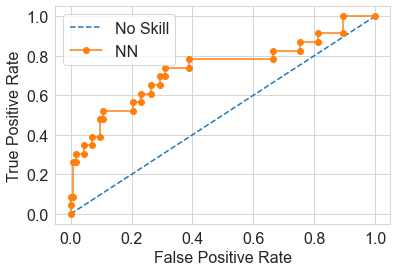

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       113
           1       0.00      0.00      0.00        23

    accuracy                           0.83       136
   macro avg       0.42      0.50      0.45       136
weighted avg       0.69      0.83      0.75       136

MSE 0.16911764705882354


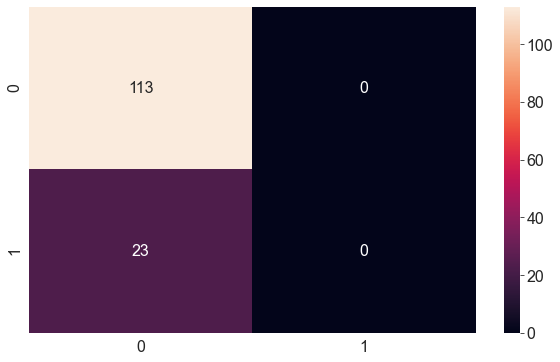

In [82]:
cvscores_NN_10_ridge_StructuredAnswer= []
(model_NN_10_ridge_StructuredAnswer,cvscores_NN_10_ridge_StructuredAnswer,FP_Rate_NN_10_ridge_StructuredAnswer,TP_Rate_NN_10_ridge_StructuredAnswer,auc_NN_10_ridge_StructuredAnswer) = apply_NN_Moadel(10,18,200,selectedFeatures_ridge_10_StructuredAnswer,cSA,TSA)

accuracy: 80.88%
accuracy: 86.76%
accuracy: 84.56%
accuracy: 86.03%
accuracy: 87.50%
accuracy: 86.76%
accuracy: 87.50%
accuracy: 84.56%
accuracy: 83.82%
accuracy: 88.24%
CV Score  85.66% (+/- 2.11%)


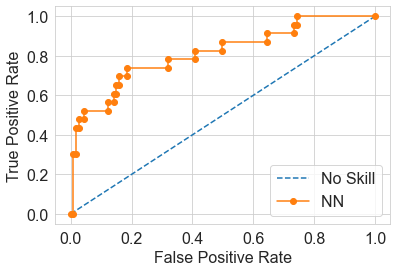

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       113
           1       0.00      0.00      0.00        23

    accuracy                           0.83       136
   macro avg       0.42      0.50      0.45       136
weighted avg       0.69      0.83      0.75       136

MSE 0.16911764705882354


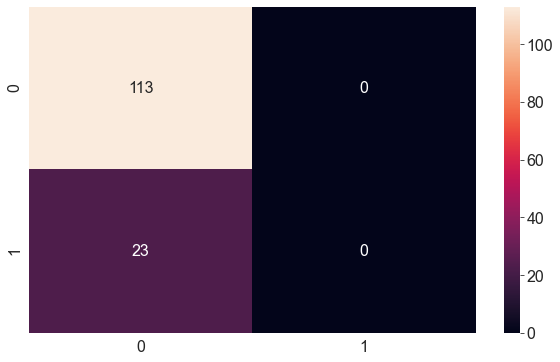

In [83]:
cvscores_NN_20_ridge_StructuredAnswer= [] 
(model_NN_20_ridge_StructuredAnswer,cvscores_NN_20_ridge_StructuredAnswer,FP_Rate_NN_20_ridge_StructuredAnswer,TP_Rate_NN_20_ridge_StructuredAnswer,auc_NN_20_ridge_StructuredAnswer) = apply_NN_Moadel(20,18,200,selectedFeatures_ridge_20_StructuredAnswer,cSA,TSA)

accuracy: 89.71%
accuracy: 86.03%
accuracy: 87.50%
accuracy: 83.82%
accuracy: 86.76%
accuracy: 85.29%
accuracy: 86.03%
accuracy: 82.35%
accuracy: 84.56%
accuracy: 80.88%
CV Score  85.29% (+/- 2.42%)


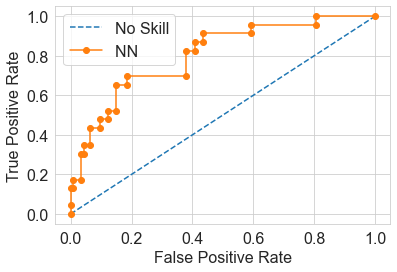

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       113
           1       0.00      0.00      0.00        23

    accuracy                           0.83       136
   macro avg       0.42      0.50      0.45       136
weighted avg       0.69      0.83      0.75       136

MSE 0.16911764705882354


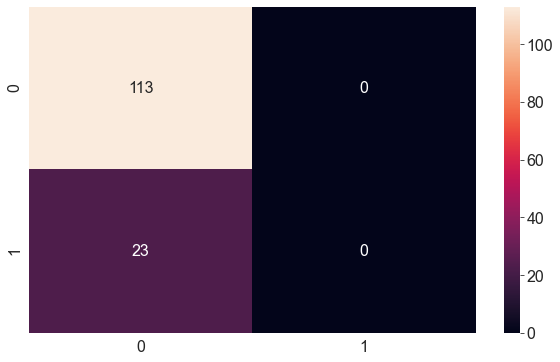

In [84]:
cvscores_NN_30_ridge_StructuredAnswer= []
(model_NN_30_ridge_StructuredAnswer,cvscores_NN_30_ridge_StructuredAnswer,FP_Rate_NN_30_ridge_StructuredAnswer,TP_Rate_NN_30_ridge_StructuredAnswer,auc_NN_30_ridge_StructuredAnswer) = apply_NN_Moadel(30,24,200,selectedFeatures_ridge_30_StructuredAnswer,cSA,TSA)

accuracy: 75.00%
accuracy: 80.15%
accuracy: 76.47%
accuracy: 83.09%
accuracy: 77.94%
accuracy: 77.94%
accuracy: 81.62%
accuracy: 83.82%
accuracy: 80.15%
accuracy: 79.41%
CV Score  79.56% (+/- 2.67%)


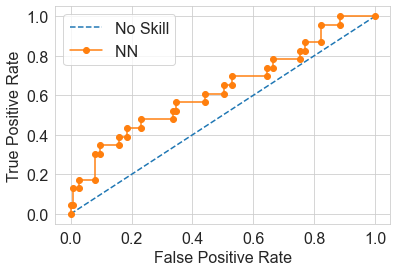

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       113
           1       0.00      0.00      0.00        23

    accuracy                           0.83       136
   macro avg       0.42      0.50      0.45       136
weighted avg       0.69      0.83      0.75       136

MSE 0.16911764705882354


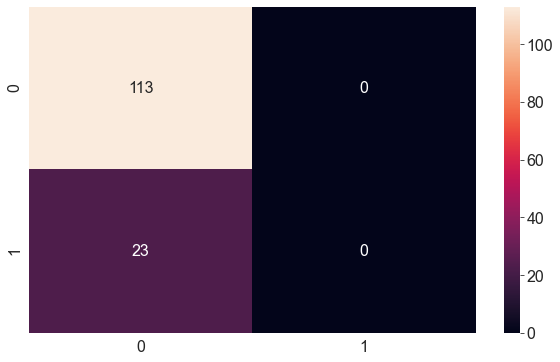

In [85]:
cvscores_NN_10_lasso_StructuredAnswer= [] 
(model_NN_10_lasso_StructuredAnswer,cvscores_NN_10_lasso_StructuredAnswer,FP_Rate_NN_10_lasso_StructuredAnswer,TP_Rate_NN_10_lasso_StructuredAnswer,auc_NN_10_lasso_StructuredAnswer) = apply_NN_Moadel(10,18,200,selectedFeatures_lasso_10_StructuredAnswer,cSA,TSA)

accuracy: 86.76%
accuracy: 88.97%
accuracy: 83.09%
accuracy: 81.62%
accuracy: 88.24%
accuracy: 86.03%
accuracy: 88.97%
accuracy: 88.24%
accuracy: 85.29%
accuracy: 86.76%
CV Score  86.40% (+/- 2.35%)


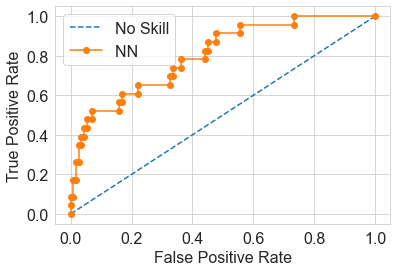

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       113
           1       0.00      0.00      0.00        23

    accuracy                           0.83       136
   macro avg       0.42      0.50      0.45       136
weighted avg       0.69      0.83      0.75       136

MSE 0.16911764705882354


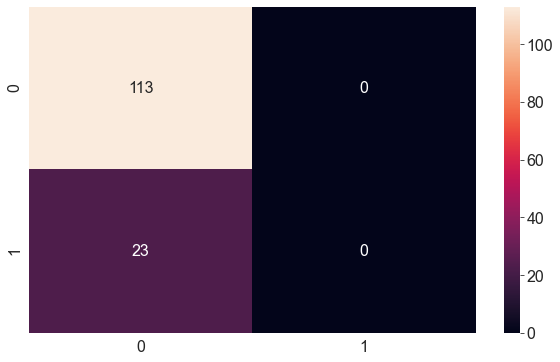

In [86]:
cvscores_NN_20_lasso_StructuredAnswer= [] 
(model_NN_20_lasso_StructuredAnswer,cvscores_NN_20_lasso_StructuredAnswer,FP_Rate_NN_20_lasso_StructuredAnswer,TP_Rate_NN_20_lasso_StructuredAnswer,auc_NN_20_lasso_StructuredAnswer) = apply_NN_Moadel(20,18,200,selectedFeatures_lasso_20_StructuredAnswer,cSA,TSA)

accuracy: 85.29%
accuracy: 85.29%
accuracy: 78.68%
accuracy: 85.29%
accuracy: 85.29%
accuracy: 84.56%
accuracy: 83.09%
accuracy: 91.18%
accuracy: 84.56%
accuracy: 85.29%
CV Score  84.85% (+/- 2.87%)


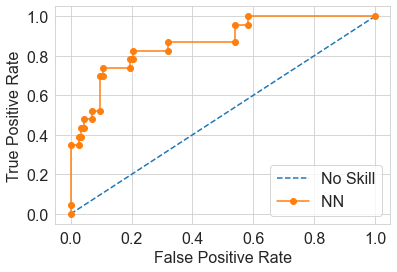

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       113
           1       0.00      0.00      0.00        23

    accuracy                           0.83       136
   macro avg       0.42      0.50      0.45       136
weighted avg       0.69      0.83      0.75       136

MSE 0.16911764705882354


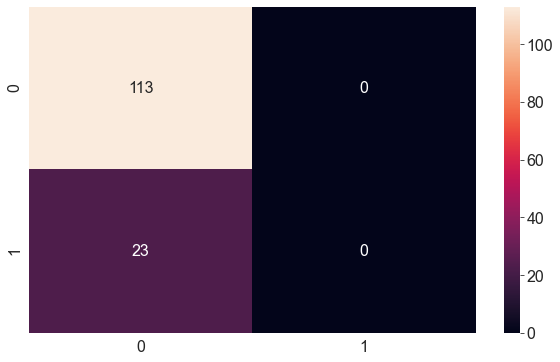

In [87]:
cvscores_NN_30_lasso_StructuredAnswer= [] 
(model_NN_30_lasso_StructuredAnswer,cvscores_NN_30_lasso_StructuredAnswer,FP_Rate_NN_30_lasso_StructuredAnswer,TP_Rate_NN_30_lasso_StructuredAnswer,auc_NN_30_lasso_StructuredAnswer) = apply_NN_Moadel(30,24,200,selectedFeatures_lasso_30_StructuredAnswer,cSA,TSA)

accuracy: 86.76%
accuracy: 89.71%
accuracy: 87.50%
accuracy: 88.97%
accuracy: 88.24%
accuracy: 84.56%
accuracy: 86.76%
accuracy: 88.97%
accuracy: 90.44%
accuracy: 82.35%
CV Score  87.43% (+/- 2.34%)


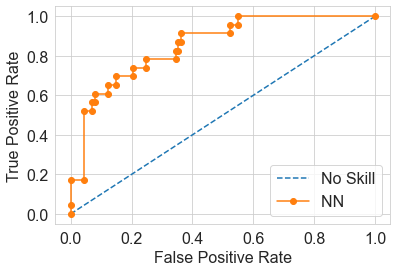

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       113
           1       0.00      0.00      0.00        23

    accuracy                           0.83       136
   macro avg       0.42      0.50      0.45       136
weighted avg       0.69      0.83      0.75       136

MSE 0.16911764705882354


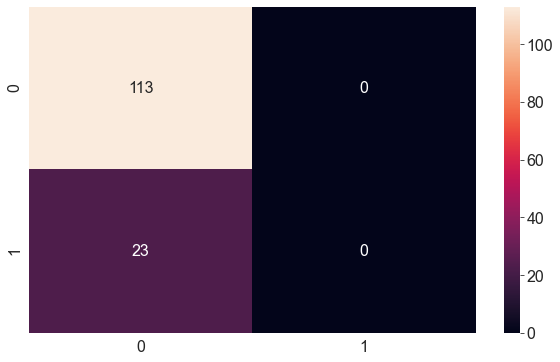

In [88]:
cvscores_NN_10_kbest_StructuredAnswer= [] 
(model_NN_10_kbest_StructuredAnswer,cvscores_NN_10_kbest_StructuredAnswer,FP_Rate_NN_10_kbest_StructuredAnswer,TP_Rate_NN_10_kbest_StructuredAnswer,auc_NN_10_kbest_StructuredAnswer) = apply_NN_Moadel(10,18,200,selectedFeatures_kbest_10_StructuredAnswer,cSA,TSA)

accuracy: 89.71%
accuracy: 86.76%
accuracy: 90.44%
accuracy: 91.18%
accuracy: 90.44%
accuracy: 91.18%
accuracy: 88.24%
accuracy: 89.71%
accuracy: 85.29%
accuracy: 90.44%
CV Score  89.34% (+/- 1.87%)


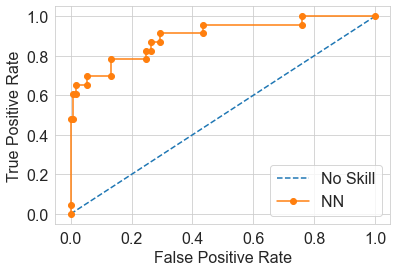

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       113
           1       0.00      0.00      0.00        23

    accuracy                           0.83       136
   macro avg       0.42      0.50      0.45       136
weighted avg       0.69      0.83      0.75       136

MSE 0.16911764705882354


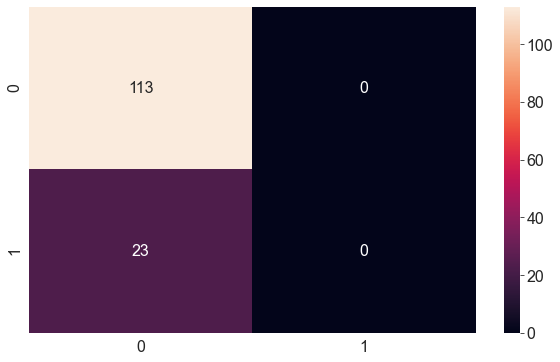

In [89]:
cvscores_NN_20_kbest_StructuredAnswer= [] 
(model_NN_20_kbest_StructuredAnswer,cvscores_NN_20_kbest_StructuredAnswer,FP_Rate_NN_20_kbest_StructuredAnswer,TP_Rate_NN_20_kbest_StructuredAnswer,auc_NN_20_kbest_StructuredAnswer) = apply_NN_Moadel(20,18,200,selectedFeatures_kbest_20_StructuredAnswer,cSA,TSA)

accuracy: 91.18%
accuracy: 89.71%
accuracy: 88.97%
accuracy: 88.97%
accuracy: 90.44%
accuracy: 90.44%
accuracy: 91.18%
accuracy: 87.50%
accuracy: 89.71%
accuracy: 87.50%
CV Score  89.56% (+/- 1.27%)


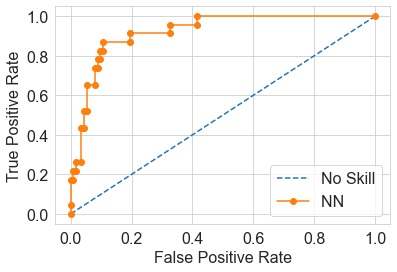

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       113
           1       0.00      0.00      0.00        23

    accuracy                           0.83       136
   macro avg       0.42      0.50      0.45       136
weighted avg       0.69      0.83      0.75       136

MSE 0.16911764705882354


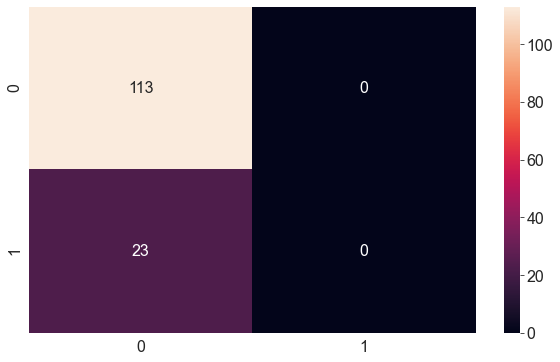

In [90]:
cvscores_NN_30_kbest_StructuredAnswer= [] 
(model_NN_30_kbest_StructuredAnswer,cvscores_NN_30_kbest_StructuredAnswer,FP_Rate_NN_30_kbest_StructuredAnswer,TP_Rate_NN_30_kbest_StructuredAnswer,auc_NN_30_kbest_StructuredAnswer) = apply_NN_Moadel(30,24,200,selectedFeatures_kbest_30_StructuredAnswer,cSA,TSA)

accuracy: 94.12%
accuracy: 95.59%
accuracy: 95.59%
accuracy: 97.06%
accuracy: 92.65%
accuracy: 97.06%
accuracy: 93.38%
accuracy: 96.32%
accuracy: 93.38%
accuracy: 94.85%
CV Score  95.00% (+/- 1.50%)


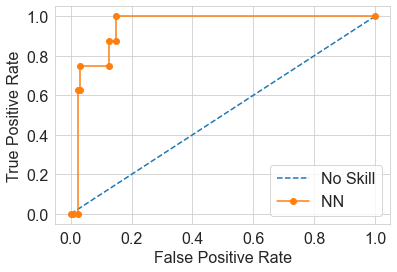

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       128
           1       0.00      0.00      0.00         8

    accuracy                           0.94       136
   macro avg       0.47      0.50      0.48       136
weighted avg       0.89      0.94      0.91       136

MSE 0.058823529411764705


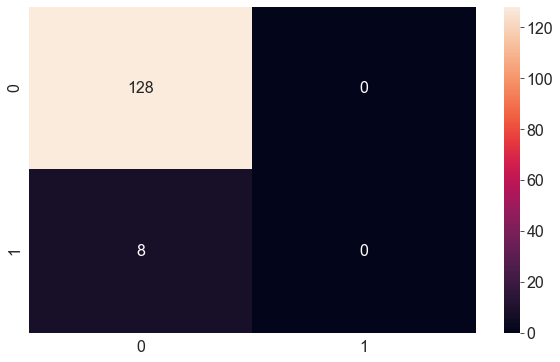

In [91]:
cvscores_NN_10_ridge_RecommendHiring= [] 
(model_NN_10_ridge_RecommendHiring,cvscores_NN_10_ridge_RecommendHiring,FP_Rate_NN_10_ridge_StructuredAnswer,TP_Rate_NN_10_ridge_RecommendHiring,auc_NN_10_ridge_RecommendHiring) = apply_NN_Moadel(10,18,200,selectedFeatures_ridge_10_RecommendHiring,cRH,TRH)

accuracy: 94.12%
accuracy: 95.59%
accuracy: 94.12%
accuracy: 93.38%
accuracy: 93.38%
accuracy: 92.65%
accuracy: 94.85%
accuracy: 96.32%
accuracy: 95.59%
accuracy: 90.44%
CV Score  94.04% (+/- 1.63%)


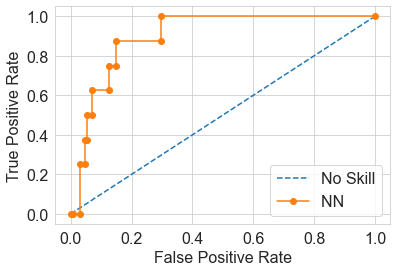

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       128
           1       0.00      0.00      0.00         8

    accuracy                           0.94       136
   macro avg       0.47      0.50      0.48       136
weighted avg       0.89      0.94      0.91       136

MSE 0.058823529411764705


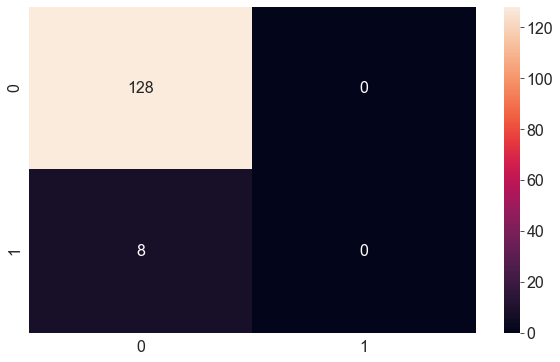

In [92]:
cvscores_NN_20_ridge_RecommendHiring= [] 
(model_NN_20_ridge_RecommendHiring,cvscores_NN_20_ridge_RecommendHiring,FP_Rate_NN_20_ridge_RecommendHiring,TP_Rate_NN_20_ridge_RecommendHiring,auc_NN_20_ridge_RecommendHiring) = apply_NN_Moadel(20,18,200,selectedFeatures_ridge_20_RecommendHiring,cRH,TRH)

accuracy: 94.85%
accuracy: 95.59%
accuracy: 94.12%
accuracy: 94.85%
accuracy: 95.59%
accuracy: 94.85%
accuracy: 94.12%
accuracy: 95.59%
accuracy: 95.59%
accuracy: 96.32%
CV Score  95.15% (+/- 0.67%)


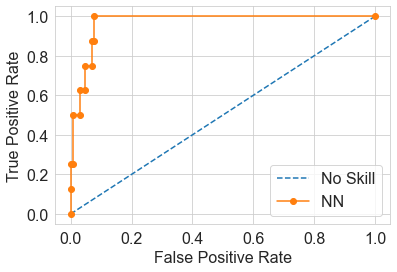

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       128
           1       0.00      0.00      0.00         8

    accuracy                           0.94       136
   macro avg       0.47      0.50      0.48       136
weighted avg       0.89      0.94      0.91       136

MSE 0.058823529411764705


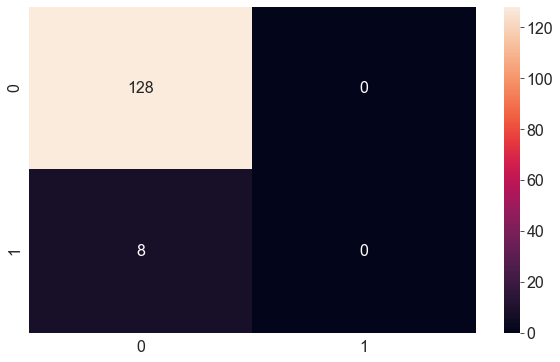

In [93]:
cvscores_NN_30_ridge_RecommendHiring= [] 
(model_NN_30_ridge_RecommendHiring,cvscores_NN_30_ridge_RecommendHiring,FP_Rate_NN_30_ridge_RecommendHiring,TP_Rate_NN_30_ridge_RecommendHiring,auc_NN_30_ridge_RecommendHiring) = apply_NN_Moadel(30,24,200,selectedFeatures_ridge_30_RecommendHiring,cRH,TRH)

accuracy: 95.59%
accuracy: 89.71%
accuracy: 92.65%
accuracy: 94.12%
accuracy: 93.38%
accuracy: 95.59%
accuracy: 91.91%
accuracy: 94.85%
accuracy: 95.59%
accuracy: 95.59%
CV Score  93.90% (+/- 1.89%)


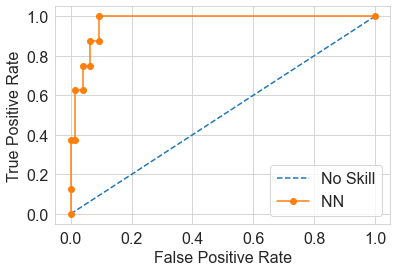

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       128
           1       0.00      0.00      0.00         8

    accuracy                           0.94       136
   macro avg       0.47      0.50      0.48       136
weighted avg       0.89      0.94      0.91       136

MSE 0.058823529411764705


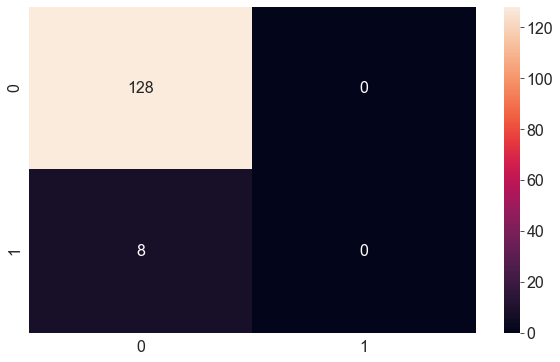

In [94]:
cvscores_NN_10_lasso_RecommendHiring= [] 
(model_NN_10_lasso_RecommendHiring,cvscores_NN_10_lasso_RecommendHiring,FP_Rate_NN_10_lasso_RecommendHiring,TP_Rate_NN_10_lasso_RecommendHiring,auc_NN_10_lasso_RecommendHiring) = apply_NN_Moadel(10,18,200,selectedFeatures_lasso_10_RecommendHiring,cRH,TRH)

accuracy: 95.59%
accuracy: 94.85%
accuracy: 92.65%
accuracy: 95.59%
accuracy: 94.12%
accuracy: 95.59%
accuracy: 97.06%
accuracy: 95.59%
accuracy: 95.59%
accuracy: 95.59%
CV Score  95.22% (+/- 1.10%)


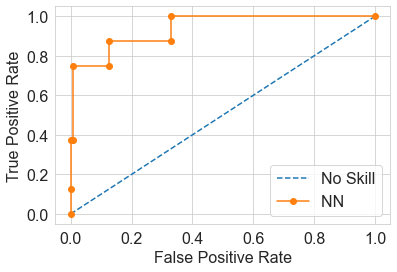

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       128
           1       0.00      0.00      0.00         8

    accuracy                           0.94       136
   macro avg       0.47      0.50      0.48       136
weighted avg       0.89      0.94      0.91       136

MSE 0.058823529411764705


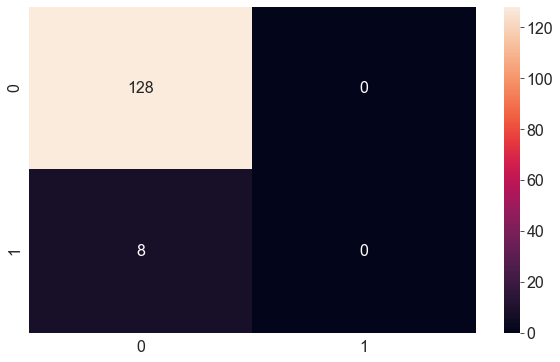

In [95]:
cvscores_NN_20_lasso_RecommendHiring= [] 
(model_NN_20_lasso_RecommendHiring,cvscores_NN_20_lasso_RecommendHiring,FP_Rate_NN_20_lasso_RecommendHiring,TP_Rate_NN_20_lasso_RecommendHiring,auc_NN_20_lasso_RecommendHiring) = apply_NN_Moadel(20,18,200,selectedFeatures_lasso_20_RecommendHiring,cRH,TRH)

accuracy: 95.59%
accuracy: 97.06%
accuracy: 96.32%
accuracy: 95.59%
accuracy: 95.59%
accuracy: 95.59%
accuracy: 96.32%
accuracy: 97.06%
accuracy: 96.32%
accuracy: 97.79%
CV Score  96.32% (+/- 0.74%)


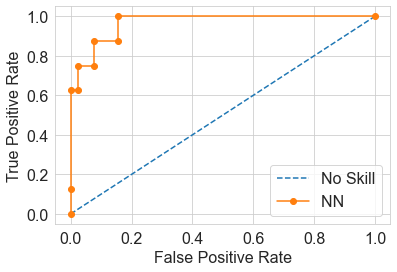

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       128
           1       0.00      0.00      0.00         8

    accuracy                           0.94       136
   macro avg       0.47      0.50      0.48       136
weighted avg       0.89      0.94      0.91       136

MSE 0.058823529411764705


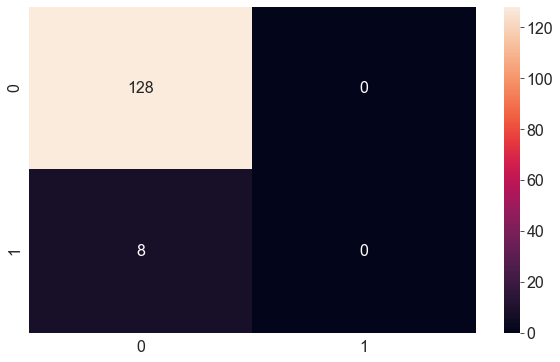

In [96]:
cvscores_NN_30_lasso_RecommendHiring= [] 
(model_NN_30_lasso_RecommendHiring,cvscores_NN_30_lasso_RecommendHiring,FP_Rate_NN_30_lasso_RecommendHiring,TP_Rate_NN_30_lasso_RecommendHiring,auc_NN_30_lasso_RecommendHiring) = apply_NN_Moadel(30,24,200,selectedFeatures_lasso_30_RecommendHiring,cRH,TRH)

accuracy: 96.32%
accuracy: 94.85%
accuracy: 96.32%
accuracy: 94.12%
accuracy: 92.65%
accuracy: 93.38%
accuracy: 97.79%
accuracy: 94.85%
accuracy: 91.91%
accuracy: 95.59%
CV Score  94.78% (+/- 1.72%)


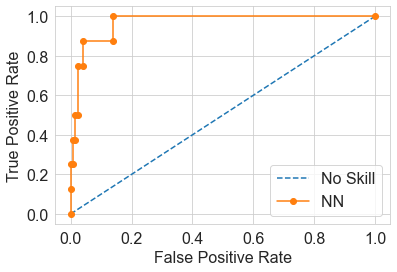

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       128
           1       0.00      0.00      0.00         8

    accuracy                           0.94       136
   macro avg       0.47      0.50      0.48       136
weighted avg       0.89      0.94      0.91       136

MSE 0.058823529411764705


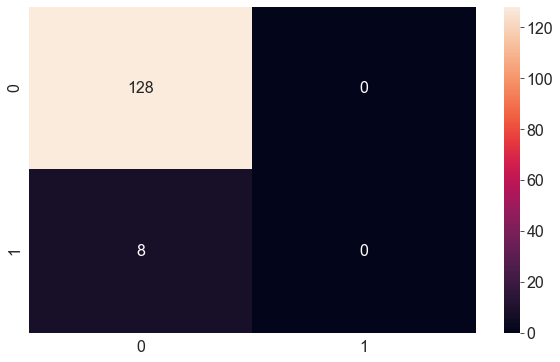

In [97]:
cvscores_NN_10_kbest_RecommendHirig= [] 
(model_NN_10__kbest_RecommendHirig,cvscores_NN_10_kbest_RecommendHirig,FP_Rate_NN_10_kbest_RecommendHirig,TP_Rate_NN_10_kbest_RecommendHirig,auc_NN_10_kbest_RecommendHirig) = apply_NN_Moadel(10,18,200,selectedFeatures_kbest_10_RecommendHiring,cRH,TRH)

accuracy: 94.85%
accuracy: 96.32%
accuracy: 95.59%
accuracy: 97.06%
accuracy: 96.32%
accuracy: 94.85%
accuracy: 97.79%
accuracy: 97.06%
accuracy: 95.59%
accuracy: 97.06%
CV Score  96.25% (+/- 0.96%)


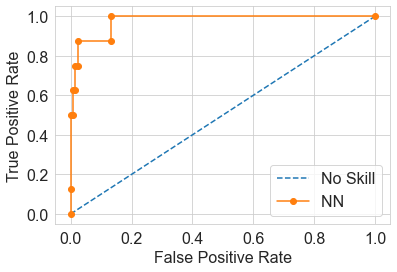

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       128
           1       0.00      0.00      0.00         8

    accuracy                           0.94       136
   macro avg       0.47      0.50      0.48       136
weighted avg       0.89      0.94      0.91       136

MSE 0.058823529411764705


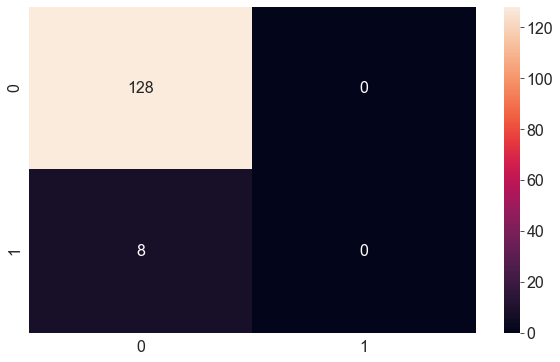

In [98]:
cvscores_NN_20_kbest_RecommendHirig= [] 
(model_NN_20__kbest_RecommendHirig,cvscores_NN_20_kbest_RecommendHirig,FP_Rate_NN_20_kbest_RecommendHirig,TP_Rate_NN_30_kbest_RecommendHirig,auc_NN_20_kbest_RecommendHirig) = apply_NN_Moadel(20,18,200,selectedFeatures_kbest_20_RecommendHiring,cRH,TRH)

accuracy: 97.06%
accuracy: 98.53%
accuracy: 98.53%
accuracy: 98.53%
accuracy: 96.32%
accuracy: 97.79%
accuracy: 98.53%
accuracy: 97.06%
accuracy: 97.79%
accuracy: 98.53%
CV Score  97.87% (+/- 0.77%)


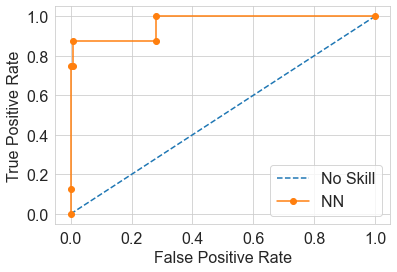

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       128
           1       0.00      0.00      0.00         8

    accuracy                           0.94       136
   macro avg       0.47      0.50      0.48       136
weighted avg       0.89      0.94      0.91       136

MSE 0.058823529411764705


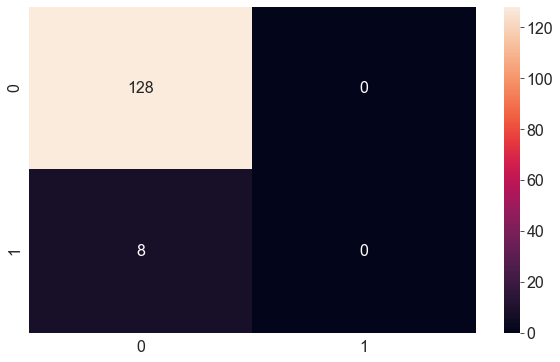

In [99]:
cvscores_NN_30_kbest_RecommendHirig= [] 
(model_NN_30__kbest_RecommendHirig,cvscores_NN_30_kbest_RecommendHirig,FP_Rate_NN_30_kbest_RecommendHirig,TP_Rate_NN_30_kbest_RecommendHirig,auc_NN_30_kbest_RecommendHirig) = apply_NN_Moadel(30,24,200,selectedFeatures_kbest_30_RecommendHiring,cRH,TRH)

accuracy: 63.97%
accuracy: 61.76%
accuracy: 58.82%
accuracy: 52.94%
accuracy: 62.50%
accuracy: 66.18%
accuracy: 69.85%
accuracy: 61.76%
accuracy: 61.76%
accuracy: 66.18%
CV Score  62.57% (+/- 4.36%)


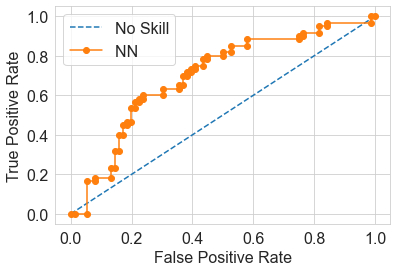

              precision    recall  f1-score   support

           0       0.56      1.00      0.72        76
           1       0.00      0.00      0.00        60

    accuracy                           0.56       136
   macro avg       0.28      0.50      0.36       136
weighted avg       0.31      0.56      0.40       136

MSE 0.4411764705882353


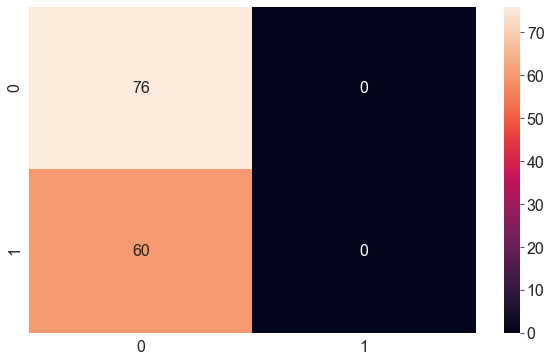

In [100]:
cvscores_NN_10_ridge_Friendly= [] 
(model_NN_10_ridge_Friendly,cvscores_NN_10_ridge_Friendly,FP_Rate_NN_10_ridge_Friendly,TP_Rate_NN_10_ridge_Friendly,auc_NN_10_ridge_Friendly) = apply_NN_Moadel(10,18,200,selectedFeatures_ridge_10_Friendly,cF,TF)

accuracy: 72.79%
accuracy: 73.53%
accuracy: 74.26%
accuracy: 72.79%
accuracy: 72.06%
accuracy: 73.53%
accuracy: 75.74%
accuracy: 77.21%
accuracy: 78.68%
accuracy: 77.94%
CV Score  74.85% (+/- 2.25%)


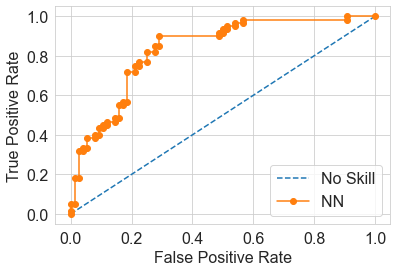

              precision    recall  f1-score   support

           0       0.56      1.00      0.72        76
           1       0.00      0.00      0.00        60

    accuracy                           0.56       136
   macro avg       0.28      0.50      0.36       136
weighted avg       0.31      0.56      0.40       136

MSE 0.4411764705882353


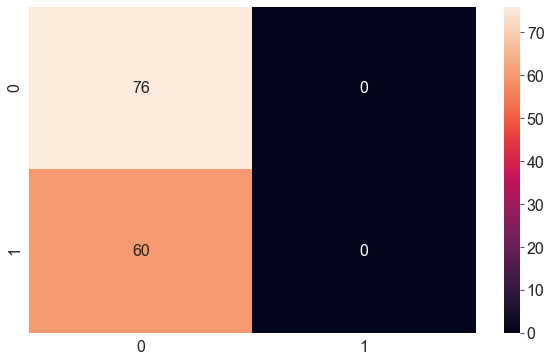

In [101]:
cvscores_NN_20_ridge_Friendly= [] 
(model_NN_20_ridge_Friendly,cvscores_NN_20_ridge_Friendly,FP_Rate_NN_20_ridge_Friendly,TP_Rate_NN_20_ridge_Friendly,auc_NN_20_ridge_Friendly) = apply_NN_Moadel(20,18,200,selectedFeatures_ridge_20_Friendly,cF,TF)

accuracy: 73.53%
accuracy: 76.47%
accuracy: 78.68%
accuracy: 66.18%
accuracy: 77.94%
accuracy: 71.32%
accuracy: 74.26%
accuracy: 72.79%
accuracy: 75.00%
accuracy: 79.41%
CV Score  74.56% (+/- 3.75%)


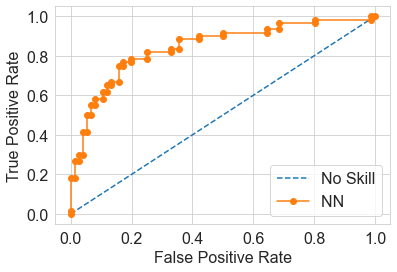

              precision    recall  f1-score   support

           0       0.56      1.00      0.72        76
           1       0.00      0.00      0.00        60

    accuracy                           0.56       136
   macro avg       0.28      0.50      0.36       136
weighted avg       0.31      0.56      0.40       136

MSE 0.4411764705882353


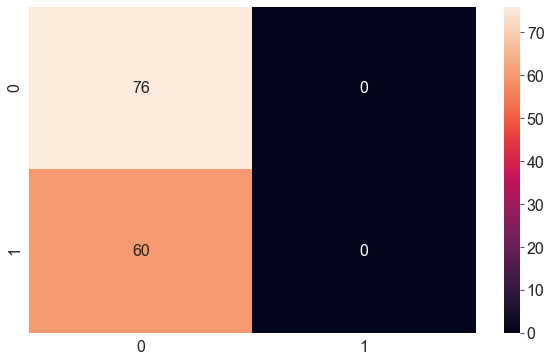

In [102]:
cvscores_NN_30_ridge_Friendly= [] 
(model_NN_30_ridge_Friendly,cvscores_NN_30_ridge_Friendly,FP_Rate_NN_30_ridge_Friendly,TP_Rate_NN_30_ridge_Friendly,auc_NN_30_ridge_Friendly) = apply_NN_Moadel(30,24,200,selectedFeatures_ridge_30_Friendly,cF,TF)

accuracy: 66.91%
accuracy: 73.53%
accuracy: 76.47%
accuracy: 73.53%
accuracy: 69.85%
accuracy: 73.53%
accuracy: 64.71%
accuracy: 69.85%
accuracy: 77.21%
accuracy: 75.00%
CV Score  72.06% (+/- 3.89%)


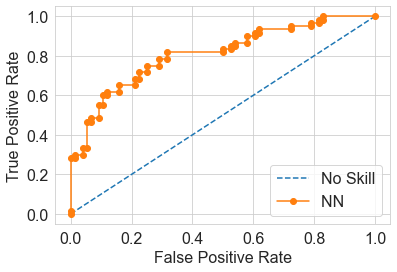

              precision    recall  f1-score   support

           0       0.56      1.00      0.72        76
           1       0.00      0.00      0.00        60

    accuracy                           0.56       136
   macro avg       0.28      0.50      0.36       136
weighted avg       0.31      0.56      0.40       136

MSE 0.4411764705882353


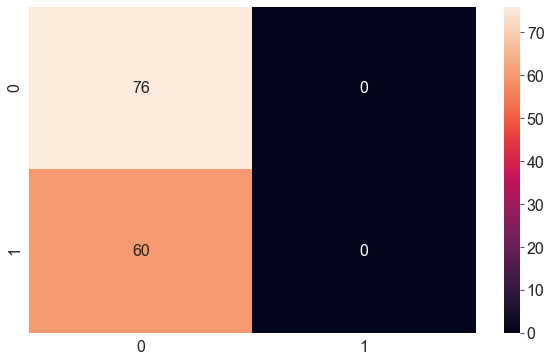

In [103]:
cvscores_NN_10_lasso_Friendly= [] 
(model_NN_10_lasso_Friendly,cvscores_NN_10_lasso_Friendly,FP_Rate_NN_10_lasso_Friendly,TP_Rate_NN_10_lasso_Friendly,auc_NN_10_lasso_Friendly) = apply_NN_Moadel(10,18,200,selectedFeatures_lasso_10_Friendly,cF,TF)

accuracy: 72.79%
accuracy: 67.65%
accuracy: 68.38%
accuracy: 73.53%
accuracy: 72.06%
accuracy: 63.24%
accuracy: 65.44%
accuracy: 65.44%
accuracy: 69.12%
accuracy: 67.65%
CV Score  68.53% (+/- 3.24%)


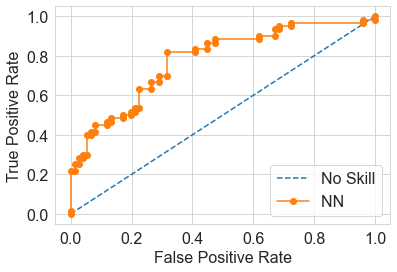

              precision    recall  f1-score   support

           0       0.56      1.00      0.72        76
           1       0.00      0.00      0.00        60

    accuracy                           0.56       136
   macro avg       0.28      0.50      0.36       136
weighted avg       0.31      0.56      0.40       136

MSE 0.4411764705882353


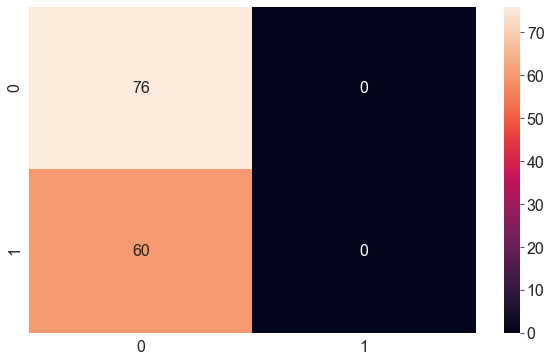

In [104]:
cvscores_NN_20_lasso_Friendly= [] 
(model_NN_20_lasso_Friendly,cvscores_NN_20_lasso_Friendly,FP_Rate_NN_20_lasso_Friendly,TP_Rate_NN_20_lasso_Friendly,auc_NN_20_lasso_Friendly) = apply_NN_Moadel(20,18,200,selectedFeatures_lasso_20_Friendly,cF,TF)

accuracy: 69.85%
accuracy: 80.88%
accuracy: 67.65%
accuracy: 72.06%
accuracy: 80.15%
accuracy: 80.15%
accuracy: 72.06%
accuracy: 75.00%
accuracy: 75.74%
accuracy: 73.53%
CV Score  74.71% (+/- 4.33%)


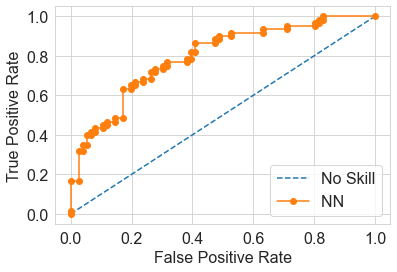

              precision    recall  f1-score   support

           0       0.56      1.00      0.72        76
           1       0.00      0.00      0.00        60

    accuracy                           0.56       136
   macro avg       0.28      0.50      0.36       136
weighted avg       0.31      0.56      0.40       136

MSE 0.4411764705882353


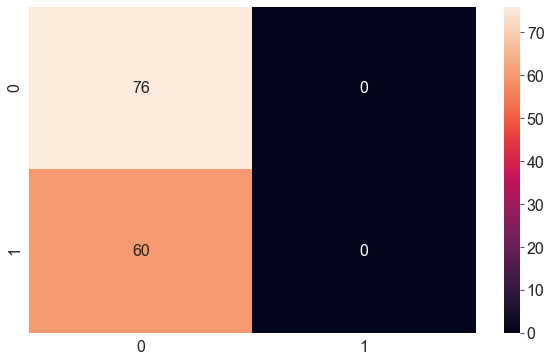

In [105]:
cvscores_NN_30_lasso_Friendly= [] 
(model_NN_30_lasso_Friendly,cvscores_NN_30_lasso_Friendly,FP_Rate_NN_30_lasso_Friendly,TP_Rate_NN_30_lasso_Friendly,auc_NN_30_lasso_Friendly) = apply_NN_Moadel(30,24,200,selectedFeatures_lasso_30_Friendly,cF,TF)

accuracy: 74.26%
accuracy: 68.38%
accuracy: 75.00%
accuracy: 73.53%
accuracy: 73.53%
accuracy: 72.79%
accuracy: 81.62%
accuracy: 72.79%
accuracy: 71.32%
accuracy: 66.91%
CV Score  73.01% (+/- 3.76%)


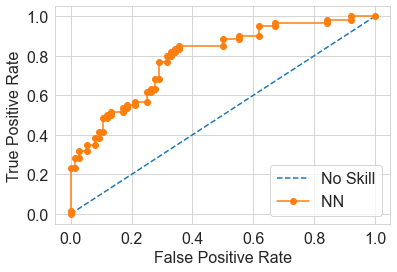

              precision    recall  f1-score   support

           0       0.56      1.00      0.72        76
           1       0.00      0.00      0.00        60

    accuracy                           0.56       136
   macro avg       0.28      0.50      0.36       136
weighted avg       0.31      0.56      0.40       136

MSE 0.4411764705882353


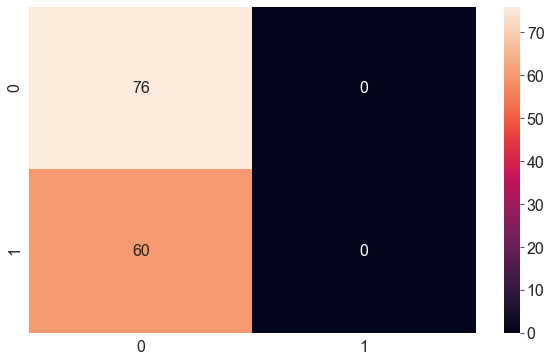

In [106]:
cvscores_NN_10_kbest_Friendly= [] 
(model_NN_10_kbest_Friendly,cvscores_NN_10_kbest_Friendly,FP_Rate_NN_10_kbest_Friendly,TP_Rate_NN_10_kbest_Friendly,auc_NN_10_kbest_Friendly) = apply_NN_Moadel(10,18,200,selectedFeatures_kbest_10_Friendly,cF,TF)

accuracy: 76.47%
accuracy: 74.26%
accuracy: 75.74%
accuracy: 80.15%
accuracy: 78.68%
accuracy: 82.35%
accuracy: 76.47%
accuracy: 77.21%
accuracy: 81.62%
accuracy: 79.41%
CV Score  78.24% (+/- 2.51%)


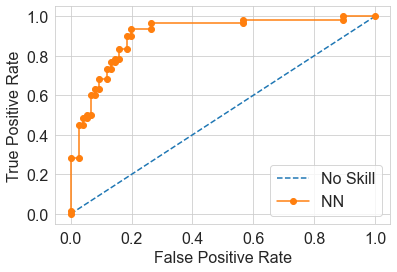

              precision    recall  f1-score   support

           0       0.56      1.00      0.72        76
           1       0.00      0.00      0.00        60

    accuracy                           0.56       136
   macro avg       0.28      0.50      0.36       136
weighted avg       0.31      0.56      0.40       136

MSE 0.4411764705882353


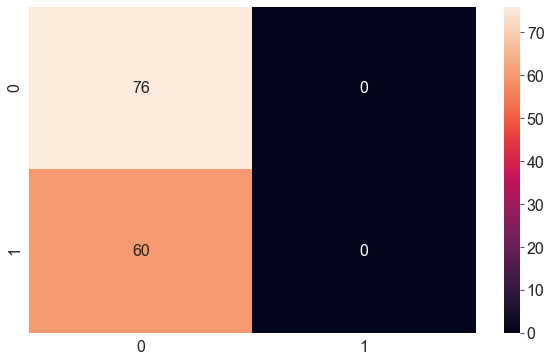

In [107]:
cvscores_NN_20_kbest_Friendly= [] 
(model_NN_20_kbest_Friendly,cvscores_NN_20_kbest_Friendly,FP_Rate_NN_20_kbest_Friendly,TP_Rate_NN_20_kbest_Friendly,auc_NN_20_kbest_Friendly) = apply_NN_Moadel(20,18,200,selectedFeatures_kbest_20_Friendly,cF,TF)

accuracy: 84.56%
accuracy: 79.41%
accuracy: 77.94%
accuracy: 80.88%
accuracy: 83.82%
accuracy: 80.88%
accuracy: 80.15%
accuracy: 83.82%
accuracy: 85.29%
accuracy: 80.88%
CV Score  81.76% (+/- 2.32%)


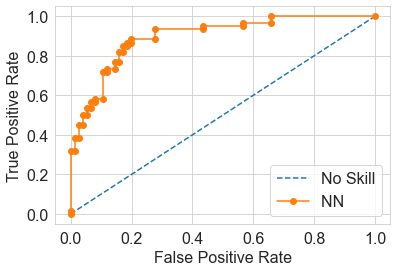

              precision    recall  f1-score   support

           0       0.56      1.00      0.72        76
           1       0.00      0.00      0.00        60

    accuracy                           0.56       136
   macro avg       0.28      0.50      0.36       136
weighted avg       0.31      0.56      0.40       136

MSE 0.4411764705882353


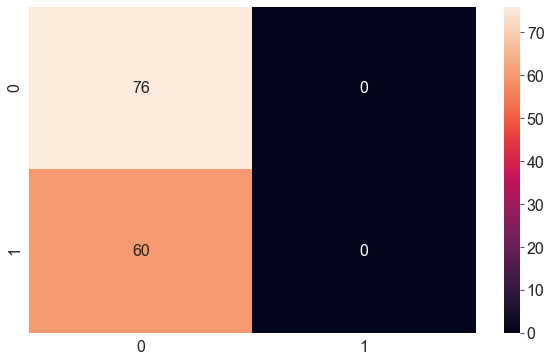

In [108]:
cvscores_NN_30_kbest_Friendly= [] 
(model_NN_30_kbest_Friendly,cvscores_NN_30_kbest_Friendly,FP_Rate_NN_30_kbest_Friendly,TP_Rate_NN_30_kbest_Friendly,auc_NN_30_kbest_Friendly) = apply_NN_Moadel(30,24,200,selectedFeatures_kbest_30_Friendly,cF,TF)

accuracy: 64.71%
accuracy: 57.35%
accuracy: 60.29%
accuracy: 58.09%
accuracy: 65.44%
accuracy: 63.97%
accuracy: 68.38%
accuracy: 57.35%
accuracy: 63.24%
accuracy: 66.18%
CV Score  62.50% (+/- 3.76%)


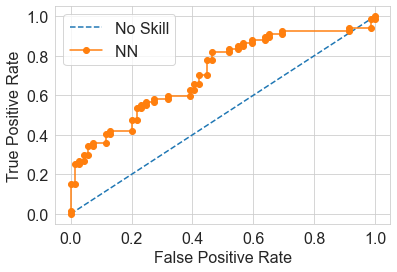

              precision    recall  f1-score   support

           0       0.51      1.00      0.67        69
           1       0.00      0.00      0.00        67

    accuracy                           0.51       136
   macro avg       0.25      0.50      0.34       136
weighted avg       0.26      0.51      0.34       136

MSE 0.49264705882352944


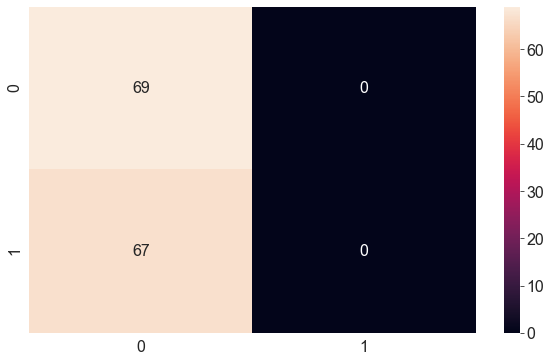

In [109]:
cvscores_NN_10_ridge_NotStressed= [] 
(model_NN_10_ridge_NotStressed,cvscores_NN_10_ridge_NotStressed,FP_Rate_NN_10_ridge_NotStressed,TP_Rate_NN_10_ridge_NotStressed,auc_NN_10_ridge_NotStressed) = apply_NN_Moadel(10,18,200,selectedFeatures_ridge_10_NotStressed,cNS,TNS)

accuracy: 69.12%
accuracy: 63.24%
accuracy: 63.97%
accuracy: 68.38%
accuracy: 67.65%
accuracy: 69.85%
accuracy: 65.44%
accuracy: 64.71%
accuracy: 68.38%
accuracy: 65.44%
CV Score  66.62% (+/- 2.21%)


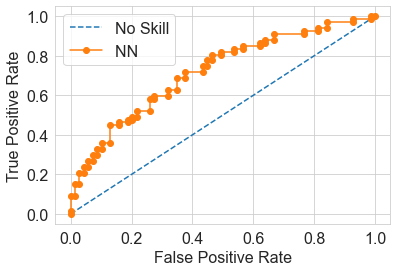

              precision    recall  f1-score   support

           0       0.51      1.00      0.67        69
           1       0.00      0.00      0.00        67

    accuracy                           0.51       136
   macro avg       0.25      0.50      0.34       136
weighted avg       0.26      0.51      0.34       136

MSE 0.49264705882352944


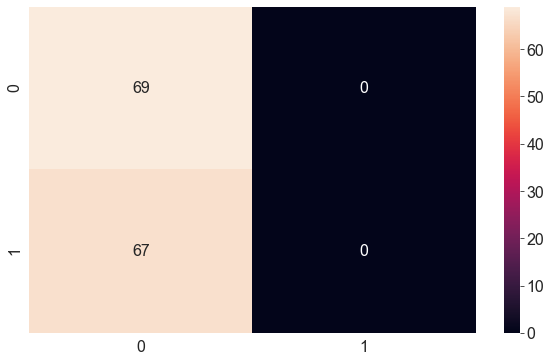

In [110]:
cvscores_NN_20_ridge_NotStressed= [] 
(model_NN_20_ridge_NotStressed,cvscores_NN_20_ridge_NotStressed,FP_Rate_NN_20_ridge_NotStressed,TP_Rate_NN_20_ridge_NotStressed,auc_NN_20_ridge_NotStressed) = apply_NN_Moadel(20,18,200,selectedFeatures_ridge_20_NotStressed,cNS,TNS)

accuracy: 71.32%
accuracy: 63.24%
accuracy: 69.85%
accuracy: 73.53%
accuracy: 61.03%
accuracy: 72.79%
accuracy: 69.12%
accuracy: 71.32%
accuracy: 60.29%
accuracy: 69.12%
CV Score  68.16% (+/- 4.60%)


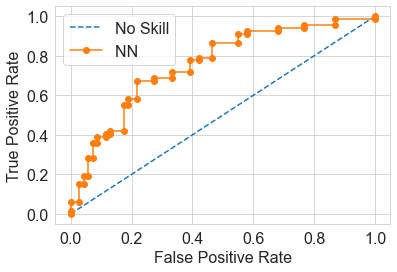

              precision    recall  f1-score   support

           0       0.51      1.00      0.67        69
           1       0.00      0.00      0.00        67

    accuracy                           0.51       136
   macro avg       0.25      0.50      0.34       136
weighted avg       0.26      0.51      0.34       136

MSE 0.49264705882352944


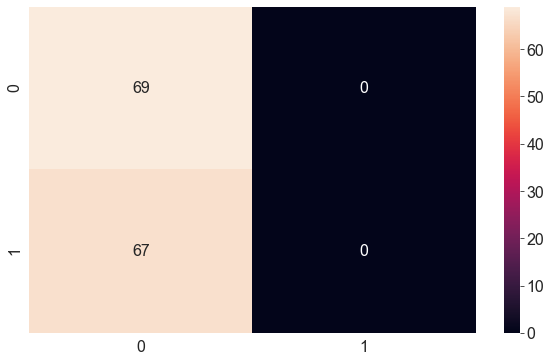

In [111]:
cvscores_NN_30_ridge_NotStressed= [] 
(model_NN_30_ridge_NotStressed,cvscores_NN_30_ridge_NotStressed,FP_Rate_NN_30_ridge_NotStressed,TP_Rate_NN_30_ridge_NotStressed,auc_NN_30_ridge_NotStressed) = apply_NN_Moadel(30,24,200,selectedFeatures_ridge_30_NotStressed,cNS,TNS)

accuracy: 55.88%
accuracy: 63.97%
accuracy: 66.91%
accuracy: 62.50%
accuracy: 65.44%
accuracy: 65.44%
accuracy: 64.71%
accuracy: 72.06%
accuracy: 68.38%
accuracy: 55.15%
CV Score  64.04% (+/- 4.94%)


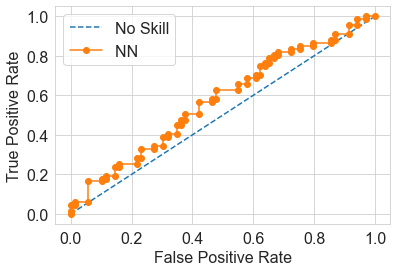

              precision    recall  f1-score   support

           0       0.51      1.00      0.67        69
           1       0.00      0.00      0.00        67

    accuracy                           0.51       136
   macro avg       0.25      0.50      0.34       136
weighted avg       0.26      0.51      0.34       136

MSE 0.49264705882352944


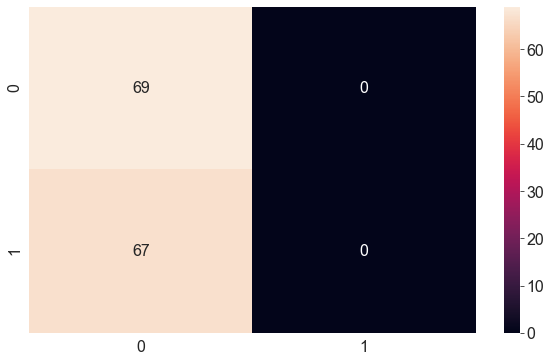

In [112]:
cvscores_NN_10_lasso_NotStressed= [] 
(model_NN_10_lasso_NotStressed,cvscores_NN_10_lasso_NotStressed,FP_Rate_NN_10_lasso_NotStressed,TP_Rate_NN_10_lasso_NotStressed,auc_NN_10_lasso_NotStressed) = apply_NN_Moadel(10,18,200,selectedFeatures_lasso_10_NotStressed,cNS,TNS)

accuracy: 69.12%
accuracy: 63.24%
accuracy: 60.29%
accuracy: 65.44%
accuracy: 63.24%
accuracy: 65.44%
accuracy: 67.65%
accuracy: 69.85%
accuracy: 69.12%
accuracy: 70.59%
CV Score  66.40% (+/- 3.24%)


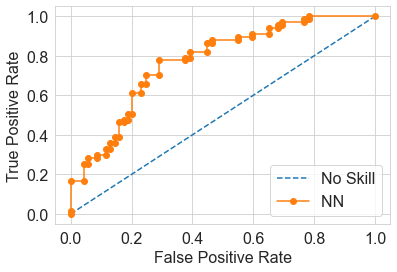

              precision    recall  f1-score   support

           0       0.51      1.00      0.67        69
           1       0.00      0.00      0.00        67

    accuracy                           0.51       136
   macro avg       0.25      0.50      0.34       136
weighted avg       0.26      0.51      0.34       136

MSE 0.49264705882352944


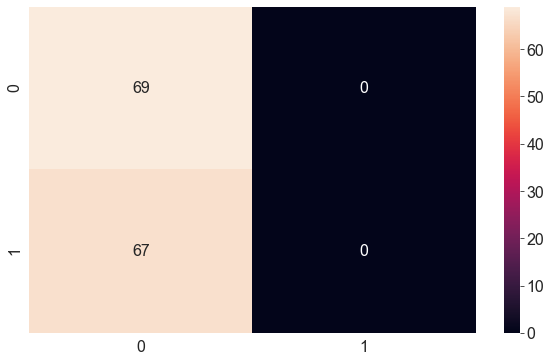

In [113]:
cvscores_NN_20_lasso_NotStressed= [] 
(model_NN_20_lasso_NotStressed,cvscores_NN_20_lasso_NotStressed,FP_Rate_NN_20_lasso_NotStressed,TP_Rate_NN_20_lasso_NotStressed,auc_NN_20_lasso_NotStressed) = apply_NN_Moadel(20,18,200,selectedFeatures_lasso_20_NotStressed,cNS,TNS)

accuracy: 69.12%
accuracy: 72.06%
accuracy: 69.85%
accuracy: 69.85%
accuracy: 72.06%
accuracy: 61.76%
accuracy: 64.71%
accuracy: 68.38%
accuracy: 64.71%
accuracy: 71.32%
CV Score  68.38% (+/- 3.34%)


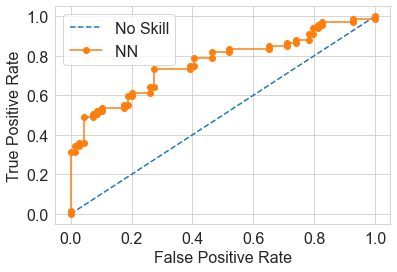

              precision    recall  f1-score   support

           0       0.51      1.00      0.67        69
           1       0.00      0.00      0.00        67

    accuracy                           0.51       136
   macro avg       0.25      0.50      0.34       136
weighted avg       0.26      0.51      0.34       136

MSE 0.49264705882352944


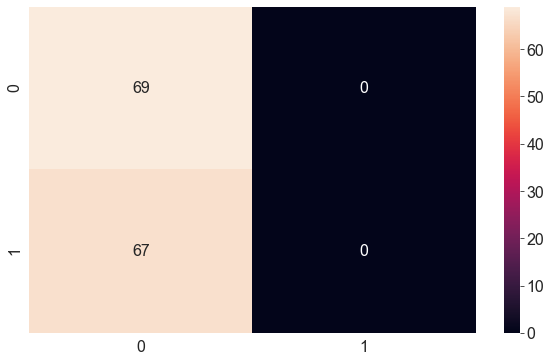

In [114]:
cvscores_NN_30_lasso_NotStressed= [] 
(model_NN_30_lasso_NotStressed,cvscores_NN_30_lasso_NotStressed,FP_Rate_NN_30_lasso_NotStressed,TP_Rate_NN_30_lasso_NotStressed,auc_NN_30_lasso_NotStressed) = apply_NN_Moadel(30,24,200,selectedFeatures_lasso_30_NotStressed,cNS,TNS)

accuracy: 72.06%
accuracy: 69.85%
accuracy: 75.00%
accuracy: 70.59%
accuracy: 70.59%
accuracy: 64.71%
accuracy: 68.38%
accuracy: 72.06%
accuracy: 72.79%
accuracy: 67.65%
CV Score  70.37% (+/- 2.77%)


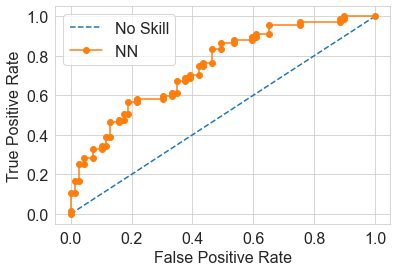

              precision    recall  f1-score   support

           0       0.51      1.00      0.67        69
           1       0.00      0.00      0.00        67

    accuracy                           0.51       136
   macro avg       0.25      0.50      0.34       136
weighted avg       0.26      0.51      0.34       136

MSE 0.49264705882352944


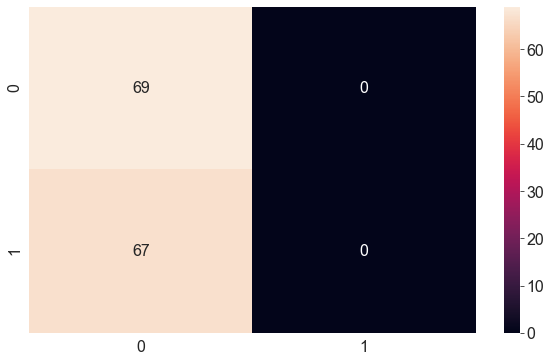

In [115]:
cvscores_NN_10_kbest_NotStressed= [] 
(model_NN_10_kbest_NotStressed,cvscores_NN_10_kbest_NotStressed,FP_Rate_NN_10_kbest_NotStressed,TP_Rate_NN_10_kbest_NotStressed,auc_NN_10_kbest_NotStressed) = apply_NN_Moadel(10,18,200,selectedFeatures_kbest_10_NotStressed,cNS,TNS)

accuracy: 80.88%
accuracy: 75.74%
accuracy: 75.74%
accuracy: 76.47%
accuracy: 69.85%
accuracy: 75.00%
accuracy: 75.00%
accuracy: 73.53%
accuracy: 70.59%
accuracy: 76.47%
CV Score  74.93% (+/- 2.97%)


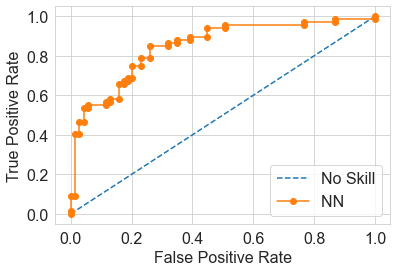

              precision    recall  f1-score   support

           0       0.51      1.00      0.67        69
           1       0.00      0.00      0.00        67

    accuracy                           0.51       136
   macro avg       0.25      0.50      0.34       136
weighted avg       0.26      0.51      0.34       136

MSE 0.49264705882352944


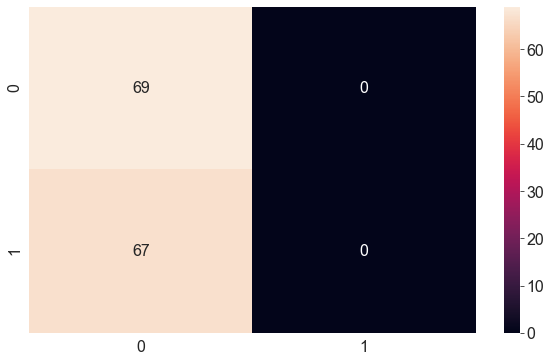

In [116]:
cvscores_NN_20_kbest_NotStressed= [] 
(model_NN_20_kbest_NotStressed,cvscores_NN_20_kbest_NotStressed,FP_Rate_NN_20_kbest_NotStressed,TP_Rate_NN_20_kbest_NotStressed,auc_NN_20_kbest_NotStressed) = apply_NN_Moadel(20,18,200,selectedFeatures_kbest_20_NotStressed,cNS,TNS)

accuracy: 74.26%
accuracy: 77.94%
accuracy: 75.74%
accuracy: 77.21%
accuracy: 73.53%
accuracy: 76.47%
accuracy: 77.21%
accuracy: 78.68%
accuracy: 77.21%
accuracy: 77.21%
CV Score  76.54% (+/- 1.52%)


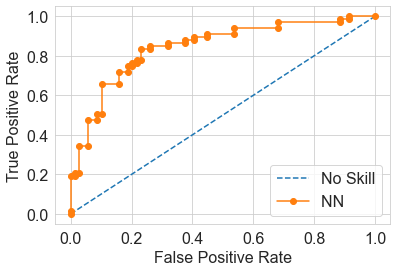

              precision    recall  f1-score   support

           0       0.51      1.00      0.67        69
           1       0.00      0.00      0.00        67

    accuracy                           0.51       136
   macro avg       0.25      0.50      0.34       136
weighted avg       0.26      0.51      0.34       136

MSE 0.49264705882352944


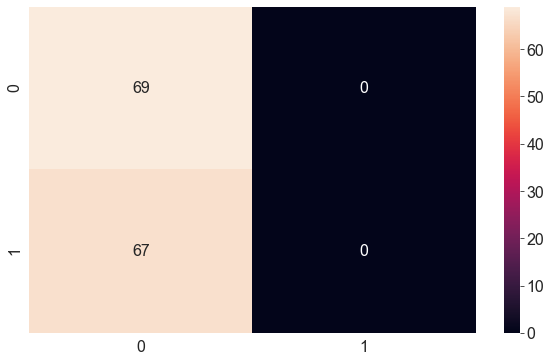

In [117]:
cvscores_NN_30_kbest_NotStressed= [] 
(model_NN_30_kbest_NotStressed,cvscores_NN_30_kbest_NotStressed,FP_Rate_NN_30_kbest_NotStressed,TP_Rate_NN_30_kbest_NotStressed,auc_NN_30_kbest_NotStressed) = apply_NN_Moadel(30,24,200,selectedFeatures_kbest_30_NotStressed,cNS,TNS)

# Apply Other Models

In [118]:
def Apply_Model(model,model_name,X_train,X_test,y_train,y_test):
    
    clf = model.fit(X_train,y_train)
    pred = model.predict(X_test)            
    
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    # fit a model
    model.fit(X_train,y_train)
    # predict probabilities
    m_probs = model.predict_proba(X_test)
        
    # keep probabilities for the positive outcome only
    m_probs = m_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    m_auc = roc_auc_score(y_test, m_probs)
    # summarize scores
    # print('No Skill: ROC AUC=%.3f' % (ns_auc))
    # print('Logistic: ROC AUC=%.3f' % (m_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    m_fpr, m_tpr, _ = roc_curve(y_test, m_probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(m_fpr, m_tpr, marker='.', label=model_name)   
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    
    
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred,zero_division=0))
    
    print('MSE',metrics.mean_squared_error(y_test,pred))
    
    if(model == svc_model):
      m_Cross = cross_val_score(model,X20,y20,cv=10)
    elif(model == knn):
      m_Cross = cross_val_score(model,X20,y20,cv=10)
    elif(model == rfc):
      m_Cross = cross_val_score(model,X20,y20,cv=10)
    print("Mean : ",m_Cross)
    print("CV Score  %.2f%% (+/- %.2f%%)" % (np.mean(m_Cross), np.std(m_Cross)))
    
    
    plt.figure(figsize = (10,6))
    sns.heatmap(confusion_matrix(y_test, pred), annot = True,fmt='d')
    plt.show()
    
    
    return (m_fpr, m_tpr,m_auc)

In [119]:
get_ipython().run_line_magic('matplotlib', 'inline')
X20=prosody_data[selectedFeatures_kbest_20_Friendly]
y20=cF
X20_train, X20_test, y20_train, y20_test = train_test_split(X20, y20, test_size=0.20, random_state=10)

# Applying Random Forest Classifier¶

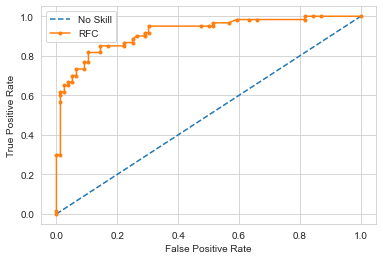

[[68  8]
 [13 47]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87        76
           1       0.85      0.78      0.82        60

    accuracy                           0.85       136
   macro avg       0.85      0.84      0.84       136
weighted avg       0.85      0.85      0.84       136

MSE 0.15441176470588236


NameError: name 'svc_model' is not defined

In [120]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
(rfc_fpr, rfc_tpr, rfc_auc)=Apply_Model(rfc,"RFC",X20_train, X20_test, y20_train, y20_test)

cross_val_score(rfc, X20, y20,cv=10)


In [ ]:
dA1= prosody_data[['Friendly','NotStressed','StructuredAnswers']]
cor =dA1.corr()
cor.style.background_gradient(cmap="coolwarm").set_precision(2)



In [ ]:
RidgeRegScratch.fit()